In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset_path = ('/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8')

In [ ]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 50.5 MB/s eta 0:00:00


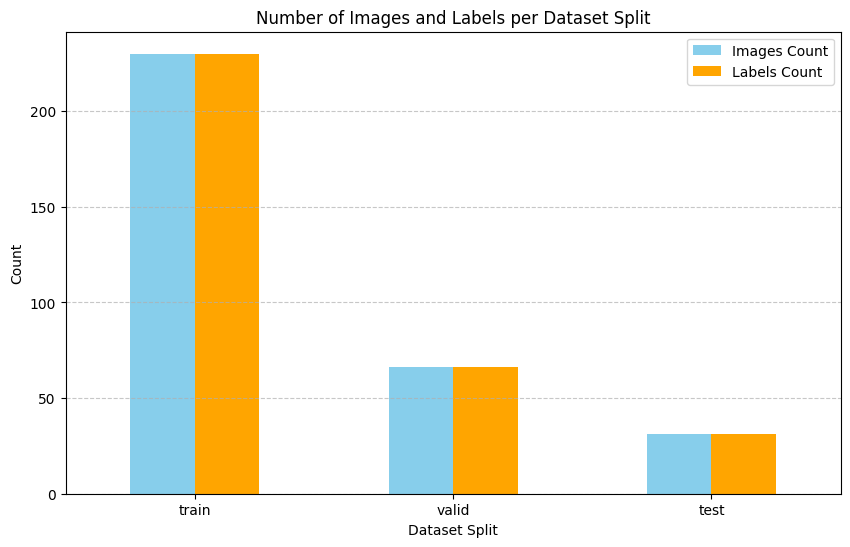

Images Count  Labels Count
train           230           230
valid            66            66
test             31            31

In [ ]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset path
dataset_path = "/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8"

# Define paths for train, valid, and test images and labels
folders = {
    "train": {
        "images": os.path.join(dataset_path, "train/images"),
        "labels": os.path.join(dataset_path, "train/labels")
    },
    "valid": {
        "images": os.path.join(dataset_path, "valid/images"),
        "labels": os.path.join(dataset_path, "valid/labels")
    },
    "test": {
        "images": os.path.join(dataset_path, "test/images"),
        "labels": os.path.join(dataset_path, "test/labels")
    },
}

# Count files in each folder
file_counts = {
    folder: {
        "images": len(glob(os.path.join(paths["images"], "*.jpg"))),
        "labels": len(glob(os.path.join(paths["labels"], "*.txt")))
    }
    for folder, paths in folders.items()
}

file_counts_df = pd.DataFrame(file_counts).T
file_counts_df.columns = ["Images Count", "Labels Count"]

# Visualize file counts
file_counts_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Number of Images and Labels per Dataset Split")
plt.ylabel("Count")
plt.xlabel("Dataset Split")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper right")
plt.show()

# Show file counts
file_counts_df


In [ ]:
# Helper function to get image-label pairs for validation
def check_image_label_consistency(images_folder, labels_folder):
    image_files = set(os.path.basename(f).split('.')[0] for f in glob(os.path.join(images_folder, "*.jpg")))
    label_files = set(os.path.basename(f).split('.')[0] for f in glob(os.path.join(labels_folder, "*.txt")))

    images_without_labels = image_files - label_files
    labels_without_images = label_files - image_files

    return {
        "total_images": len(image_files),
        "total_labels": len(label_files),
        "images_without_labels": len(images_without_labels),
        "labels_without_images": len(labels_without_images),
        "images_without_labels_list": images_without_labels,
        "labels_without_images_list": labels_without_images,
    }

# Checking consistency for each dataset split
consistency_results = {
    split: check_image_label_consistency(paths["images"], paths["labels"])
    for split, paths in folders.items()
}

consistency_results


{'train': {'total_images': 230,
  'total_labels': 230,
  'images_without_labels': 0,
  'labels_without_images': 0,
  'images_without_labels_list': set(),
  'labels_without_images_list': set()},
 'valid': {'total_images': 66,
  'total_labels': 66,
  'images_without_labels': 0,
  'labels_without_images': 0,
  'images_without_labels_list': set(),
  'labels_without_images_list': set()},
 'test': {'total_images': 31,
  'total_labels': 31,
  'images_without_labels': 0,
  'labels_without_images': 0,
  'images_without_labels_list': set(),
  'labels_without_images_list': set()}}

In [ ]:
from ultralytics import YOLO

# Path dataset YAML
dataset_path = '/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml'

# Daftar model YOLOv8 yang akan digunakan
model_variants = ['yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt']

# Parameter pelatihan
train_params = {
    'data': dataset_path,
    'epochs': 100,
    'imgsz': 640,
    'augment': True
}

# Melatih masing-masing model
for model_path in model_variants:
    print(f"Training model: {model_path}")
    model = YOLO(model_path)  # Load model
    # Pass train_params as keyword arguments using **
    model.train(**train_params)  # Start training

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Training model: yolov8s.pt


100%|██████████| 21.5M/21.5M [00:00<00:00, 448MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

100%|██████████| 755k/755k [00:00<00:00, 96.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 313MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.03G      2.294      4.931      2.435         15        640: 100%|██████████| 15/15 [01:13<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         66         78      0.106     0.0513     0.0225    0.00381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.85G      1.936      2.803      2.092         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         66         78          1     0.0385     0.0566     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.05G      1.972      2.681      2.097         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         66         78     0.0297      0.115     0.0146    0.00423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         4G      2.094        2.6      2.209         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78     0.0985      0.103     0.0336    0.00688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.02G      2.202      2.659      2.291         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         66         78     0.0104      0.244    0.00603    0.00158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         4G      2.247      2.709      2.389         19        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all         66         78    0.00193      0.462    0.00171   0.000523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.04G      2.262      2.751       2.35         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         66         78     0.0668     0.0256    0.00752    0.00263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.07G      2.233      2.716      2.295         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         66         78    0.00999      0.244    0.00656     0.0021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.18G       2.23      2.673      2.332         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         66         78     0.0235      0.154    0.00833    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.03G      2.202      2.739      2.345         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         66         78     0.0262     0.0513    0.00694      0.002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.03G      2.132      2.653      2.318         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         66         78     0.0789     0.0256     0.0249    0.00567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.06G      2.215      2.624      2.302         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         66         78      0.068     0.0256     0.0271     0.0046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.16G      2.109      2.569      2.248         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         66         78     0.0783      0.141     0.0318     0.0102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.05G      2.062      2.537      2.202         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


                   all         66         78      0.119      0.231      0.109     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.05G      2.131      2.551      2.237         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         66         78      0.127      0.179     0.0821     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.05G      2.062      2.542      2.173         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         66         78      0.199      0.179     0.0993     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.16G      2.071      2.448      2.166         17        640: 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78      0.343     0.0641     0.0748     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.03G      2.069      2.492      2.143         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         66         78      0.112      0.308      0.119     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.04G      1.936      2.391      2.068         12        640: 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         66         78     0.0542     0.0769     0.0349     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.06G      1.976      2.319      2.085         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         66         78      0.134      0.231      0.118     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.01G      2.067      2.379      2.137         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         66         78      0.161      0.244      0.155     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.04G      1.915      2.348      2.057         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         66         78      0.389      0.154      0.149     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.04G      1.949      2.344      2.124         11        640: 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         66         78      0.189      0.179      0.141     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.07G      1.939      2.319      2.071         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         66         78      0.306      0.308      0.253     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.01G      1.908      2.236       2.01         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         66         78      0.312      0.295      0.286     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.05G      1.844      2.153       1.98         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         66         78      0.193      0.217      0.129     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.03G      1.962      2.247      2.063         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         66         78     0.0955      0.167     0.0751     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.07G      1.865      2.223      2.021         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         66         78      0.158       0.26      0.142     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         4G      1.885      2.198      2.017         18        640: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         66         78      0.119      0.308      0.135     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.03G      1.869       2.25      2.036         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         66         78      0.178      0.346      0.168     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.03G      1.863       2.21      1.985         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         66         78      0.441      0.282        0.3      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.07G      1.823      2.173      2.001         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         66         78      0.278      0.331      0.231     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.18G      1.804      2.214      1.946         18        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         66         78      0.374      0.256      0.264      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.05G      1.836       2.12      1.986         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         66         78      0.402      0.354      0.317      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.03G      1.733      2.056      1.902         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         66         78      0.259      0.346      0.258     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.06G      1.739      2.102      1.931         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         66         78       0.48      0.343      0.322      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.02G      1.786      2.118       1.95         15        640: 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         66         78      0.447      0.282      0.328       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.03G      1.801      2.111      1.966         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         66         78       0.49      0.321      0.346      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.03G      1.776      2.067      1.907         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         66         78      0.319      0.372      0.308      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.07G      1.789      1.968       1.92         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         66         78      0.386      0.346      0.338      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.01G      1.751      1.933      1.899         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         66         78      0.347      0.346      0.331      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.05G      1.806      2.016      1.922         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         66         78      0.443      0.367      0.361      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.03G      1.701      1.975      1.823         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         66         78      0.376      0.397      0.372      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.04G      1.774      1.985      1.883         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]


                   all         66         78      0.367      0.386       0.29      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.01G      1.762      1.908      1.874         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


                   all         66         78      0.584      0.308      0.392      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.87G      1.814      2.012       1.89         19        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all         66         78      0.396       0.47      0.378      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.03G      1.716      1.945      1.831         15        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         66         78      0.418      0.487      0.375      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.05G      1.735       1.94      1.869          9        640: 100%|██████████| 15/15 [00:06<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all         66         78      0.425      0.346      0.313      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.18G      1.629      1.842      1.823         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         66         78      0.397      0.372       0.35      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.03G      1.689       1.87      1.847         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         66         78      0.444      0.397      0.398      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.03G      1.696      1.882      1.841         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         66         78      0.425      0.462      0.427      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.07G      1.719      1.883      1.854         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         66         78      0.512      0.295      0.343      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.16G      1.703      1.849      1.852         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


                   all         66         78      0.275      0.442      0.325      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.05G      1.716      1.912      1.859         10        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         66         78      0.383      0.359      0.368      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.04G      1.644      1.833       1.76         11        640: 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         66         78      0.407      0.396      0.378      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.05G      1.646      1.792      1.764         15        640: 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78      0.441      0.474      0.468      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.01G      1.611      1.751      1.752         10        640: 100%|██████████| 15/15 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         66         78      0.442       0.41      0.427       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.05G      1.571      1.729      1.727         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         66         78      0.375      0.423       0.37      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.03G      1.611      1.794      1.801          7        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         66         78      0.308      0.474       0.36      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.07G      1.597      1.662      1.762         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         66         78      0.469      0.385      0.399      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.01G      1.595      1.739      1.779         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         66         78      0.495      0.439      0.426      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.03G      1.553      1.725      1.725         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         66         78      0.369      0.442      0.345      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.02G      1.537      1.614      1.707         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         66         78      0.422      0.385      0.373      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.05G      1.604      1.698      1.779         11        640: 100%|██████████| 15/15 [00:06<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         66         78      0.409      0.474      0.409      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.16G       1.59      1.667      1.741         10        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         66         78      0.377       0.41      0.394      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.04G      1.566      1.612      1.746         11        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         66         78      0.498      0.359      0.374      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.02G      1.664      1.659      1.769         16        640: 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         66         78      0.436      0.423      0.418      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.07G      1.509      1.597      1.682         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         66         78      0.554      0.462      0.465      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.01G      1.559      1.579      1.716         10        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         66         78      0.552      0.395      0.425      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.05G      1.547      1.573      1.718         15        640: 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78      0.438      0.389       0.37      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.87G      1.512      1.593      1.699         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         66         78      0.296      0.423      0.272      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.07G      1.486      1.543      1.684         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         66         78      0.436      0.474      0.399      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         4G      1.469      1.529      1.654         17        640: 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         66         78      0.646      0.359      0.399      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.05G      1.472       1.51      1.659         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         66         78      0.465      0.449      0.433      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.04G       1.49      1.488      1.654         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         66         78      0.435      0.436      0.377      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.05G      1.511      1.507      1.677          9        640: 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78      0.559      0.373      0.405      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.16G      1.387       1.42      1.592         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78       0.55       0.41      0.426      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.05G      1.501      1.467      1.688         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78      0.626      0.321      0.369      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.86G      1.467       1.47      1.646         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78       0.48       0.41      0.396       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.07G       1.43      1.421      1.587         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         66         78      0.599      0.346      0.428       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.01G      1.437      1.466      1.648         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         66         78      0.555      0.423      0.467      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.04G      1.383      1.381      1.596         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         66         78      0.451      0.453      0.398      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.02G      1.382      1.378      1.596         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]


                   all         66         78      0.448      0.372      0.355      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.07G      1.418      1.395       1.62         17        640: 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         66         78      0.474      0.381      0.372      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.18G      1.381      1.359      1.583          8        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


                   all         66         78      0.511      0.359      0.402      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.03G      1.367      1.328      1.576         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         66         78      0.565      0.423      0.448      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.02G      1.422      1.429      1.626         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         66         78      0.485      0.449      0.441      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.05G      1.416      1.388      1.609         11        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         66         78      0.614      0.359      0.439      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.16G       1.39      1.328      1.587         23        640: 100%|██████████| 15/15 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all         66         78      0.665      0.346      0.413      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.03G      1.387      1.324      1.599         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         66         78      0.579      0.372        0.4      0.157


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.03G      1.383      1.304      1.654          6        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         66         78      0.446      0.486      0.415      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.06G      1.302      1.229      1.647          6        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         66         78      0.536      0.504      0.446      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.16G       1.31      1.185      1.681          6        640: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         66         78      0.563      0.474      0.442      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.03G      1.267       1.14      1.633          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         66         78      0.502      0.474       0.44      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.02G      1.278      1.168      1.646          9        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         66         78      0.503      0.385       0.42       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.07G       1.28       1.07       1.64          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         66         78       0.56      0.397      0.425      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.16G      1.251      1.047      1.598          8        640: 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         66         78      0.584      0.378      0.434      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.05G      1.287      1.099      1.656          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


                   all         66         78      0.626      0.372       0.44      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.87G       1.18     0.9997       1.53          6        640: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         66         78      0.595      0.385       0.44      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.04G      1.219      1.034      1.583          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         66         78      0.623      0.372      0.448      0.186

100 epochs completed in 0.271 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


                   all         66         78      0.647      0.474      0.512       0.21
Speed: 0.4ms preprocess, 49.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train
Training model: yolov8m.pt


100%|██████████| 49.7M/49.7M [00:00<00:00, 336MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.96G      2.198      3.231      2.336         15        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         66         78     0.0859      0.167     0.0391    0.00938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       6.8G      2.106      2.954      2.256         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78     0.0193      0.231    0.00943    0.00204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.84G      2.314      2.809      2.386         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         66         78    0.00495      0.615    0.00512    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.79G      2.403      2.851      2.458         13        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         66         78   5.51e-05     0.0128   2.79e-05   5.58e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.8G      2.533      2.989      2.486         22        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         66         78   5.51e-05     0.0128   2.79e-05   5.58e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.74G       2.48      3.012      2.528         19        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78   0.000153     0.0128   8.11e-05   6.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.82G       2.44      3.092      2.536         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         66         78   0.000153     0.0128   8.11e-05   6.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.84G       2.37      3.049      2.508         14        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         66         78   6.68e-05     0.0128   3.37e-05   3.37e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.78G       2.37      3.008      2.486         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         66         78   0.000298     0.0641   0.000425   7.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.85G      2.328      2.997       2.46         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         66         78   0.000833     0.0128   0.000428   4.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.85G      2.287      2.941      2.421         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78    0.00231      0.208    0.00134   0.000371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.85G      2.319      2.864      2.437         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         66         78     0.0067      0.128    0.00342   0.000875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       6.8G      2.234      2.888      2.414         13        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         66         78      0.033      0.115     0.0105    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.84G      2.185      2.888      2.337         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         66         78    0.00587      0.205    0.00471    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.84G      2.185      2.815      2.302         12        640: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         66         78      0.109     0.0641     0.0376     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.84G      2.116      2.767      2.242         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         66         78     0.0464      0.269       0.03    0.00861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.78G      2.108      2.791      2.242         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         66         78      0.172      0.128      0.081     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.84G      2.207      2.877      2.324         20        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


                   all         66         78     0.0146      0.321     0.0093     0.0025

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.87G      2.075      2.844      2.227         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         66         78      0.129     0.0641     0.0217    0.00472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.86G      2.101      2.762      2.227         16        640: 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         66         78     0.0222     0.0513     0.0136    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.78G      2.125      2.706      2.217         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         66         78     0.0143      0.244       0.01    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.85G      2.092      2.639      2.183         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         66         78      0.281      0.128      0.106     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.87G      2.161      2.731      2.223         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


                   all         66         78     0.0815     0.0641      0.039     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.87G      2.119      2.744      2.178         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         66         78      0.128     0.0897      0.058       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.78G      2.006       2.57      2.108         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78       0.13      0.269      0.081     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.84G      2.008      2.554      2.116         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         66         78      0.172      0.256      0.119     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.85G      2.049      2.666      2.147         13        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         66         78      0.277      0.205      0.162     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.86G      1.999      2.656      2.109         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         66         78      0.148      0.154      0.103     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.8G      1.965      2.582      2.068         18        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         66         78      0.174      0.192      0.136     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.84G      2.062      2.656      2.179         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         66         78      0.227      0.241      0.155     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.84G      2.074      2.593      2.132         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         66         78      0.123      0.128     0.0986     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.85G      2.031      2.602      2.127         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         66         78      0.227      0.205      0.149     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       6.8G      1.938      2.604      2.048         18        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         66         78      0.248      0.218       0.16     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.83G      2.038      2.594      2.133         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         66         78      0.235      0.231      0.177     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.85G      1.969      2.502      2.085         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         66         78      0.183      0.308      0.171     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.85G      1.944      2.537      2.078         17        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78      0.138      0.258      0.132     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       6.8G      1.969      2.591      2.103         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         66         78      0.235      0.256      0.174     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.84G      1.955       2.51      2.081         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         66         78      0.267      0.218      0.171     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.84G      1.941      2.549      2.038         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         66         78      0.302      0.231      0.242      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.86G      1.941      2.428      2.059         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         66         78      0.311      0.359      0.252     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.8G      1.906      2.364      2.048         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         66         78      0.296      0.282      0.225      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.86G      1.957      2.535      2.095         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         66         78      0.237      0.282      0.194     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.84G      1.894       2.44      2.015         16        640: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         66         78      0.205      0.128      0.146      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.86G      1.995      2.545      2.094         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         66         78      0.216      0.192      0.176     0.0676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.8G      1.928      2.446      2.068         18        640: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         66         78      0.238      0.154      0.172     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.84G      1.924      2.544      2.052         19        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


                   all         66         78      0.225      0.244      0.192     0.0833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.86G      1.897      2.474       2.04         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         66         78      0.122      0.234      0.144     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.85G      1.883      2.471      2.001          9        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         66         78      0.198      0.272      0.162     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       6.8G      1.812      2.383      1.955         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.195      0.231      0.201     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.83G      1.857      2.363      1.992         14        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.254      0.269       0.22     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.85G      1.838      2.432      1.964         20        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         66         78      0.432      0.205      0.258      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.84G      1.838      2.345      1.961         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         66         78      0.249      0.333      0.258     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.78G      1.902      2.312      2.021         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         66         78      0.243      0.256      0.212     0.0937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.85G      1.863      2.353      1.996         10        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         66         78      0.284      0.223      0.219     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.84G      1.875      2.365      1.971         11        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         66         78      0.323      0.295      0.241      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.85G      1.841      2.328      1.974         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         66         78      0.327      0.269      0.239     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       6.8G      1.749      2.257      1.923         10        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         66         78      0.335      0.278       0.23     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.85G      1.785      2.247      1.908         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         66         78      0.263      0.269      0.218      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.83G       1.84      2.366      1.978          7        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         66         78      0.219      0.321      0.196     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.84G      1.782      2.203      1.926         11        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         66         78      0.291      0.308      0.237     0.0767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.8G      1.835      2.228      1.979         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         66         78      0.343      0.359      0.279        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.84G      1.772      2.243      1.923         15        640: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         66         78      0.293      0.231      0.227     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.84G      1.799      2.214      1.944         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         66         78       0.21      0.308      0.202     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.85G      1.823      2.278      1.969         11        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         66         78      0.258      0.372      0.221     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.78G       1.82      2.218      1.948         10        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         66         78      0.303      0.321       0.25      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.85G      1.759      2.208      1.941         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         66         78      0.335      0.265      0.224     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.85G      1.868      2.284      1.973         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78      0.291      0.395      0.265      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.84G      1.735      2.232      1.901         22        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         66         78      0.385      0.295      0.271      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.74G      1.771       2.23      1.914         10        640: 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         66         78      0.461      0.295      0.313      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.85G      1.759      2.162      1.922         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         66         78      0.281      0.346      0.235     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.85G       1.77       2.26      1.918         12        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         66         78      0.323      0.313      0.257      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.85G      1.732      2.161      1.895         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         66         78      0.272      0.326      0.256       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.74G      1.733      2.144      1.858         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         66         78      0.334      0.346      0.255      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.84G      1.737       2.13      1.852         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         66         78      0.324      0.295      0.283       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.85G      1.763      2.095       1.86         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         66         78       0.47      0.321      0.345      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.84G      1.758      2.113      1.881          9        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         66         78      0.409      0.397      0.356      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.78G      1.695      1.992       1.85         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78      0.472      0.385      0.374      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.84G      1.704      2.102      1.879         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         66         78      0.419      0.388      0.374      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.85G      1.716      2.045      1.878         20        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         66         78      0.341      0.359      0.316      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.84G      1.715      2.015      1.797         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         66         78      0.324      0.423      0.274      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.74G      1.738      2.116      1.878         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         66         78      0.448      0.346      0.313      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.83G      1.664       2.02      1.791         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         66         78       0.39      0.385      0.322      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.85G      1.642      1.996      1.825         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.522      0.295      0.325      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.83G      1.696      2.063      1.843         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78       0.47      0.385      0.338      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.78G       1.66          2      1.831          8        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         66         78      0.502      0.333      0.323      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.84G      1.678      1.902      1.797         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78      0.395      0.346      0.316       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.85G      1.721      2.053      1.847         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         66         78      0.408      0.372      0.299       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.85G      1.673      2.033      1.841         11        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         66         78      0.386      0.372      0.308      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.78G      1.716      1.985      1.848         23        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         66         78      0.302      0.359      0.285      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.84G      1.719      1.975      1.871         16        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         66         78      0.391      0.372        0.3      0.121


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.84G      1.755      2.051      2.003          6        640: 100%|██████████| 15/15 [00:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78       0.38      0.385      0.306      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.84G      1.671      1.963      1.968          6        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         66         78       0.35      0.397      0.278      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.75G      1.649      1.913      1.983          6        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         66         78      0.398      0.423      0.314      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.84G      1.647      1.777      1.954          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         66         78      0.377        0.5      0.367      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.85G      1.674      1.812      1.987          9        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78      0.404      0.495      0.365      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.85G       1.62      1.819      1.973          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         66         78      0.348      0.513      0.344      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.78G      1.651      1.752      1.976          8        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         66         78      0.341      0.526      0.339      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.85G      1.688      1.779      1.996          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         66         78      0.344      0.397      0.338      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.84G      1.623      1.722      1.935          6        640: 100%|██████████| 15/15 [00:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         66         78      0.348      0.385       0.35      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.85G      1.599      1.778       1.95          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


                   all         66         78      0.343      0.436       0.36      0.153

100 epochs completed in 0.328 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


                   all         66         78      0.494      0.438      0.443      0.196
Speed: 0.4ms preprocess, 46.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train2
Training model: yolov8l.pt


100%|██████████| 83.7M/83.7M [00:00<00:00, 370MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.2G      2.342      4.286        2.5         15        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


                   all         66         78   6.28e-05     0.0128   2.74e-05   1.09e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G      2.546      3.468      2.687         13        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.4G      2.652      3.266       2.74         12        640: 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.3G      2.679      3.181      2.773         13        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.3G      2.697       3.23      2.821         22        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.3G      2.566      3.268      2.752         19        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.5G      2.611      3.297      2.786         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.4G      2.483      3.242      2.755         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         66         78    0.00236     0.0256   0.000326   0.000174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.4G      2.444      3.252      2.732         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         66         78   0.000101     0.0128   5.87e-05   2.35e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.4G      2.454      3.254      2.763         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         66         78   0.000793     0.0641   0.000652   0.000191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.4G      2.358      3.253      2.671         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         66         78   0.000793     0.0641   0.000652   0.000191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.5G      2.404      3.263      2.648         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78   0.000543     0.0128   0.000295   5.89e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.4G      2.389      3.183      2.609         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         66         78   0.000587     0.0128   0.000354   0.000173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.5G      2.313      3.249      2.594         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         66         78   0.000154     0.0385   0.000174   6.82e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.4G      2.255      3.214      2.513         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78    0.00144      0.205   0.000892   0.000148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.4G      2.354      3.268      2.596         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         66         78    0.00157     0.0128    0.00195   0.000404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.4G      2.209      3.184      2.511         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         66         78     0.0118     0.0513     0.0074    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.4G      2.322      3.213       2.51         20        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         66         78    0.00182      0.462    0.00165   0.000628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.4G      2.254      3.132      2.497         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         66         78    0.00274     0.0513    0.00185   0.000609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.5G      2.238      3.141      2.474         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78    0.00278      0.679    0.00358     0.0011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.4G      2.262       3.15      2.465         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         66         78    0.00277      0.372    0.00238   0.000593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.4G      2.196      3.088      2.428         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         66         78    0.00268     0.0385    0.00131   0.000423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.5G      2.228      3.107      2.444         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         66         78   0.000736     0.0769   0.000696   0.000179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.4G      2.253      3.107       2.42         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         66         78     0.0384      0.218     0.0269    0.00572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.3G      2.191      3.037      2.399         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78     0.0133      0.167     0.0121    0.00381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.5G       2.17      3.018      2.373         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


                   all         66         78     0.0278      0.103     0.0198     0.0057

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.5G      2.222      3.043      2.394         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78     0.0597      0.244     0.0529     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.4G      2.169      3.066       2.34         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         66         78     0.0172      0.115     0.0146    0.00401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.4G      2.188      3.102      2.365         18        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78     0.0163      0.154     0.0136    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.4G      2.191      3.017      2.371         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78     0.0844     0.0769     0.0498     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.4G      2.232      2.943      2.333         13        640: 100%|██████████| 15/15 [00:12<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         66         78      0.138     0.0769     0.0669      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.5G      2.096      2.922      2.296         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


                   all         66         78     0.0619      0.115     0.0352     0.0115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.3G      2.186      2.987      2.308         18        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78      0.127      0.141     0.0649     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.4G      2.183      2.929      2.342         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         66         78      0.141     0.0897     0.0634     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.5G      2.077       2.87      2.233         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78     0.0232      0.154     0.0156    0.00495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.4G      2.051      2.917      2.262         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         66         78      0.245     0.0769     0.0799     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.3G      2.122      2.916       2.27         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78     0.0679      0.103     0.0532     0.0217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.4G      2.134       2.96      2.314         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         66         78      0.022      0.167     0.0297     0.0093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.5G       2.15      2.918      2.275         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


                   all         66         78      0.159      0.128     0.0922     0.0266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.4G      2.082      2.821      2.235         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         66         78      0.108      0.231     0.0734     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.3G      2.039      2.778      2.238         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         66         78      0.152      0.103     0.0952     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.5G      2.088      2.915       2.24         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         66         78      0.111      0.192      0.102     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.5G      2.059      2.862      2.204         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78      0.151      0.192      0.104     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.4G      2.091      2.866      2.222         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         66         78      0.142      0.167      0.099     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.3G      2.076      2.824      2.236         18        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


                   all         66         78      0.181      0.167      0.112      0.045

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.5G      2.097      2.948      2.229         19        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         66         78      0.144     0.0897      0.103       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.5G      2.008      2.811      2.168         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78      0.105      0.128      0.118     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.5G      2.072      2.823      2.173          9        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         66         78      0.113      0.128      0.108     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.3G      1.983      2.727      2.146         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         66         78       0.21      0.123      0.125     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.5G       2.07      2.694      2.193         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         66         78      0.243      0.128      0.154     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.4G      2.047      2.791      2.185         20        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         66         78      0.262      0.115      0.128     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.4G      2.021      2.727      2.159         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         66         78      0.183      0.231      0.144     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.3G      2.022       2.71      2.158         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         66         78      0.225      0.128      0.113     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.5G      2.058      2.803      2.184         10        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78      0.101      0.167     0.0687     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.5G      1.935      2.746      2.088         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78     0.0847      0.218     0.0974     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.5G      1.998      2.687      2.135         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         66         78      0.108      0.256      0.105     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.3G      1.889      2.681       2.05         10        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         66         78      0.103      0.141     0.0597     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.5G      1.953      2.715      2.107         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         66         78      0.118      0.128     0.0624     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.5G      1.965      2.735      2.136          7        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         66         78      0.146      0.154      0.145     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.5G      1.945      2.591      2.107         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         66         78      0.258      0.179      0.154     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.3G      1.964      2.601      2.132         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         66         78      0.187      0.244      0.168      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.5G      1.941      2.638      2.091         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         66         78      0.215      0.231      0.184     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.5G      1.932      2.631      2.116         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         66         78       0.22      0.228      0.172     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.4G      1.989      2.708      2.154         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         66         78      0.161      0.256      0.152     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.3G      1.984      2.673      2.129         10        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         66         78      0.162      0.231      0.149     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.4G        1.9      2.586      2.073         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         66         78      0.201      0.205      0.167     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.4G      2.012      2.726      2.126         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


                   all         66         78      0.208      0.269      0.172     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.4G       1.95      2.668      2.071         22        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         66         78      0.252      0.218      0.223      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.4G      1.936      2.655      2.069         10        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         66         78      0.165      0.231      0.158     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.4G      1.948      2.545      2.074         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.154      0.192      0.137     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.5G      1.956      2.619      2.088         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78      0.279      0.269      0.213     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.3G      1.935       2.56      2.093         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78      0.183      0.295      0.157     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.4G      1.921      2.526      2.048         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         66         78      0.135      0.192      0.133     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.4G      1.887      2.548      2.042         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78      0.201      0.249      0.173      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.4G       1.94      2.526      2.052         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         66         78      0.242      0.282      0.187     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.4G      1.906      2.508      2.052          9        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         66         78      0.213      0.218      0.188     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.3G      1.823      2.463      1.992         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         66         78      0.297      0.231      0.239     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.4G      1.893      2.505      2.062         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         66         78      0.255      0.308      0.264     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.5G      1.882      2.463       2.04         20        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78       0.25      0.256      0.275      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.5G      1.882      2.468      2.007         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         66         78      0.262      0.354      0.234      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.3G      1.892      2.529      2.055         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         66         78      0.341      0.256      0.218     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.4G      1.804      2.455      1.964         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78       0.33      0.282      0.235     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.5G      1.852      2.415      1.994         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.274      0.275      0.217     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.4G      1.831      2.446      1.975         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78      0.251      0.244      0.202     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.3G      1.861      2.412      1.995          8        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78      0.246      0.295      0.202     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.4G      1.853      2.402       1.99         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         66         78      0.263      0.333      0.207     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.5G      1.868      2.456       2.01         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.408      0.205       0.21     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.4G      1.908      2.449      2.015         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         66         78      0.315      0.295      0.235     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.3G      1.867      2.438       2.01         23        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


                   all         66         78      0.274      0.346      0.249      0.089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.5G      1.833       2.43      2.006         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78      0.335      0.359      0.253     0.0987


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.5G      1.957      2.542      2.203          6        640: 100%|██████████| 15/15 [00:12<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         66         78      0.322      0.298      0.271      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.4G      1.847      2.494       2.16          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         66         78      0.345      0.308      0.293      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.4G      1.809      2.394       2.16          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         66         78      0.333      0.346      0.278      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.4G      1.822      2.377      2.132          6        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.232      0.346      0.241     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.5G      1.839      2.278      2.177          9        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         66         78      0.316      0.397      0.301       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.4G      1.865      2.241      2.178          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         66         78      0.394      0.295      0.328      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.4G      1.823      2.258      2.153          8        640: 100%|██████████| 15/15 [00:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         66         78      0.434      0.321       0.34       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.4G      1.837      2.157       2.15          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         66         78      0.417      0.333      0.351      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.5G      1.829      2.151       2.13          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         66         78      0.369      0.368       0.33      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.4G       1.81      2.196       2.14          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         66         78      0.389      0.359      0.346      0.124



100 epochs completed in 0.477 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 87.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


                   all         66         78      0.553      0.333      0.361      0.143
Speed: 0.3ms preprocess, 48.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
from ultralytics import YOLO

# Path dataset YAML
dataset_path = '/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml'

# Daftar model YOLOv8 yang akan digunakan
model_variants = ['yolov5s.pt', 'yolov5m.pt', 'yolov5l.pt']

# Parameter pelatihan
train_params = {
    'data': dataset_path,
    'epochs': 100,
    'imgsz': 640,
    'augment': True
}

# Melatih masing-masing model
for model_path in model_variants:
    print(f"Training model: {model_path}")
    model = YOLO(model_path)  # Load model
    # Pass train_params as keyword arguments using **
    model.train(**train_params)  # Start training

Training model: yolov5s.pt
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 191MB/s]


New https://pypi.org/project/ultralytics/8.3.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, cl

train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.97G      2.235      3.409      2.317         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         66         78      0.162     0.0641     0.0546     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.28G      1.958       2.59      2.016         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


                   all         66         78     0.0603     0.0897     0.0339    0.00825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.29G      2.051      2.755      2.131         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         66         78     0.0131      0.295      0.011    0.00328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.27G      2.205      2.645      2.227         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         66         78     0.0498      0.179     0.0308    0.00736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.27G      2.236      2.637      2.229         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         66         78     0.0208     0.0897    0.00656      0.002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.27G      2.224      2.742      2.297         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


                   all         66         78    0.00834     0.0513    0.00215    0.00047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.28G      2.286      2.788      2.383         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         66         78    0.00755     0.0128   0.000713   0.000208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.29G      2.276      2.683      2.311         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         66         78    0.00377      0.154    0.00192    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.27G      2.262      2.672      2.339         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]


                   all         66         78    0.00944      0.333    0.00629    0.00183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.28G      2.229      2.701      2.338         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78     0.0807      0.157       0.03     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.28G      2.224      2.616       2.28         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


                   all         66         78    0.00965     0.0769    0.00422   0.000887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.28G      2.296      2.666      2.313         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         66         78     0.0143      0.115    0.00547    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.27G      2.193      2.591      2.267         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]


                   all         66         78     0.0997     0.0641     0.0235    0.00672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.28G      2.137      2.622      2.234         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         66         78     0.0164      0.141     0.0259     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.28G      2.176      2.661      2.247         12        640: 100%|██████████| 15/15 [00:06<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         66         78    0.00398      0.577    0.00375    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.27G      2.122      2.652      2.191         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78    0.00582      0.269    0.00482     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.27G      2.055      2.534      2.145         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78     0.0503      0.205     0.0444     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.28G      2.109      2.559       2.17         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         66         78     0.0882     0.0641     0.0187    0.00571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.28G      2.035      2.409      2.087         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         66         78      0.072     0.0256     0.0107    0.00317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.27G      2.072      2.479      2.124         16        640: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         66         78     0.0777     0.0641     0.0228    0.00549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.27G      2.062      2.517      2.096         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


                   all         66         78     0.0909      0.205     0.0453     0.0138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.28G      1.957      2.406       2.05         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         66         78      0.418      0.128      0.158     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.28G      2.029      2.415      2.112         11        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         66         78      0.261      0.205      0.149     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.29G      2.032      2.372       2.07         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all         66         78      0.197      0.205      0.115     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.27G      1.966      2.347      2.041         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         66         78      0.212      0.115      0.083     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.28G      1.934      2.346      2.065         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         66         78      0.155      0.244      0.122       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.28G       1.99       2.33      2.055         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         66         78      0.136      0.202     0.0842     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.29G      1.927      2.333      2.006         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         66         78      0.345      0.269      0.244     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.27G      1.954      2.293      2.025         18        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.301       0.21      0.166     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.28G      1.931      2.327      2.028         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         66         78      0.155      0.295      0.154     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.28G      1.951      2.248      2.013         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         66         78      0.178      0.218     0.0832     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.27G      1.884      2.199      1.984         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         66         78       0.19      0.256      0.121     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.27G      1.931      2.346      1.994         18        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         66         78      0.181      0.269      0.131     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.28G      1.953      2.324      2.041         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         66         78      0.101      0.397     0.0681     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.28G      1.856      2.191      1.939         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         66         78       0.39      0.231      0.165     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.27G      1.828      2.237      1.945         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         66         78      0.318      0.376      0.275     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.27G       1.88      2.145       1.94         15        640: 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         66         78      0.299      0.372       0.27     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.28G      1.941      2.225      2.016         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78      0.285      0.321      0.231     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.28G      1.863      2.142      1.916         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all         66         78      0.355      0.283      0.286      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.29G      1.882      2.114      1.968         15        640: 100%|██████████| 15/15 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         66         78      0.356      0.269      0.264     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.27G      1.789      2.079      1.913         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         66         78      0.352      0.359      0.304      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.28G      1.824      2.139      1.915         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         66         78      0.303      0.308       0.25     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.28G      1.794       2.14      1.899         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         66         78      0.397      0.282       0.27     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.27G      1.835      2.105      1.922         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         66         78      0.285      0.308      0.217     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.27G      1.824      2.011      1.908         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         66         78      0.275      0.346      0.215     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.28G      1.838      2.182      1.929         19        640: 100%|██████████| 15/15 [00:06<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all         66         78      0.315      0.256      0.201      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.28G      1.806      2.061      1.876         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         66         78      0.252      0.462       0.28      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.27G       1.85      2.066      1.909          9        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         66         78      0.222      0.282      0.202     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.27G      1.762      1.961      1.866         12        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.321      0.385      0.285     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.28G      1.775      1.991      1.863         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         66         78      0.371       0.31      0.314      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.28G      1.759      1.971      1.845         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         66         78       0.44      0.359      0.332      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.27G      1.774      1.965      1.871         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         66         78      0.339      0.397      0.284     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.27G      1.757       1.95      1.872         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         66         78      0.215      0.359      0.221     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.28G      1.722      2.007      1.843         10        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.306      0.256      0.232     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.28G      1.662      1.901      1.765         11        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         66         78      0.326      0.341      0.307      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.27G      1.723      1.918      1.815         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         66         78      0.259      0.282      0.265     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.27G      1.675      1.845      1.797         10        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


                   all         66         78      0.408      0.346      0.312      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.28G      1.676       1.82      1.786         16        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78       0.41      0.397      0.331      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.28G      1.737      1.871       1.85          7        640: 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         66         78      0.339       0.41      0.329      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.27G      1.709      1.803      1.831         11        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         66         78      0.379      0.414      0.304      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.27G      1.679       1.83      1.818         17        640: 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         66         78      0.468      0.346      0.369      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.28G      1.699      1.816      1.778         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         66         78      0.462        0.5      0.428      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.28G      1.664       1.73      1.788         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         66         78      0.548      0.342      0.383      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.27G      1.665      1.816      1.811         11        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         66         78      0.459       0.37      0.357      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.27G      1.684      1.799       1.79         10        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78      0.398       0.41      0.286      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.28G      1.624      1.702       1.76         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         66         78      0.349      0.385      0.277     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.28G      1.681      1.756      1.767         16        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         66         78      0.414      0.449      0.383      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.27G      1.601      1.695      1.736         22        640: 100%|██████████| 15/15 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all         66         78      0.467      0.348      0.393      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.27G      1.635       1.73      1.752         10        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         66         78      0.608      0.321      0.392      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.28G      1.616      1.709      1.754         15        640: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         66         78      0.479      0.346      0.346      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.28G      1.601      1.723      1.737         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78      0.565      0.295        0.4      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.27G      1.609      1.677      1.745         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78      0.502      0.397      0.399      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.27G      1.565      1.635      1.688         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78      0.529      0.321      0.374       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.28G      1.557      1.615      1.688         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         66         78      0.498      0.321      0.349      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.28G      1.619      1.615       1.72         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


                   all         66         78      0.395      0.451      0.404      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.27G      1.596      1.654       1.74          9        640: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         66         78      0.515      0.397      0.407      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.27G      1.516      1.571      1.679         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         66         78      0.476       0.41      0.417      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.28G      1.573      1.638       1.73         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         66         78      0.486      0.397      0.406       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.28G      1.578      1.616       1.71         20        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         66         78      0.562      0.385      0.437      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.27G      1.528      1.573      1.636         14        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         66         78      0.425      0.474      0.417      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.27G      1.572      1.589      1.719         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         66         78      0.373      0.513      0.431       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.28G      1.488       1.51      1.654         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78      0.576      0.383      0.459      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.28G      1.527      1.508      1.685         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78      0.452      0.359      0.376      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.27G      1.536       1.53      1.681         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         66         78       0.42      0.423        0.4      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.27G      1.462      1.489      1.629          8        640: 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         66         78      0.476      0.423      0.429      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.28G      1.511      1.445      1.649         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         66         78       0.45      0.461      0.436      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.28G       1.51      1.501      1.663         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         66         78      0.472      0.436      0.426       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.27G      1.516      1.503      1.659         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all         66         78      0.489      0.449      0.445      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.27G      1.489      1.476      1.653         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.445      0.423      0.412      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.28G       1.52      1.472      1.688         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         66         78       0.46      0.462      0.404      0.144


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.28G      1.511      1.474      1.759          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         66         78      0.446      0.449      0.386      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.27G      1.463      1.409      1.778          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         66         78      0.415      0.491      0.403      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.27G      1.417      1.381      1.779          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         66         78      0.554      0.372      0.395       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.28G      1.429      1.311      1.753          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         66         78      0.546      0.359      0.391      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.28G      1.415      1.297      1.765          9        640: 100%|██████████| 15/15 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         66         78      0.613      0.346      0.402      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.27G      1.387      1.256      1.734          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         66         78      0.614      0.333      0.419      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.27G      1.359      1.187      1.695          8        640: 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         66         78      0.447      0.423       0.42      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.28G       1.35      1.265      1.699          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         66         78      0.561      0.436      0.454      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.28G      1.329      1.159      1.652          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78      0.618      0.449      0.456      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.27G      1.377      1.155      1.705          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         66         78      0.573      0.436      0.439      0.165



100 epochs completed in 0.264 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 18.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


                   all         66         78       0.54      0.496      0.449      0.227
Speed: 0.4ms preprocess, 24.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train4
Training model: yolov5m.pt
PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 48.2M/48.2M [00:00<00:00, 333MB/s]


New https://pypi.org/project/ultralytics/8.3.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, cl

train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.83G      2.233      3.413       2.37         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         66         78     0.0748     0.0641     0.0211    0.00598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.69G      2.101      2.773      2.287         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


                   all         66         78     0.0272      0.167     0.0119    0.00297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.91G      2.339      2.831      2.462         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         66         78    0.00289     0.0513   0.000652   0.000107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.67G      2.334      2.797      2.506         13        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         66         78    0.00067      0.167    0.00041   0.000113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.66G      2.342      2.885       2.52         22        640: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         66         78    0.00699     0.0385   0.000734   0.000166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.67G      2.456      2.984      2.526         19        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         66         78   0.000153     0.0385      8e-05   1.86e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.74G        2.4      3.008      2.514         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78   0.000103     0.0256   5.19e-05   2.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.75G      2.446      3.041      2.562         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         66         78   0.000103     0.0256   5.19e-05   2.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.67G      2.446      3.009      2.551         17        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         66         78   0.000103     0.0256   5.19e-05   2.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.74G       2.46      3.076      2.583         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         66         78    0.00085     0.0641   0.000232   6.41e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.74G       2.37      3.064      2.537         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         66         78    0.00131      0.205   0.000816   0.000233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.91G      2.387      3.008      2.504         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78     0.0468      0.115     0.0103    0.00258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.66G      2.371      2.957      2.491         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         66         78     0.0114     0.0513    0.00634    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.73G      2.274      3.065      2.469         12        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


                   all         66         78    0.00902      0.333    0.00609    0.00152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.89G       2.28      3.038      2.488         12        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         66         78    0.00116      0.295   0.000892   0.000313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.74G      2.291      3.021      2.453         14        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78     0.0374     0.0513     0.0174    0.00726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.67G      2.171      3.037      2.378         17        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         66         78     0.0202      0.205     0.0101    0.00242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.74G      2.222      2.995      2.384         20        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         66         78     0.0124      0.103    0.00436   0.000958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       6.9G      2.156      2.858      2.319         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         66         78      0.055      0.205     0.0339    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.76G      2.128      2.803      2.298         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         66         78     0.0566      0.269     0.0335    0.00955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.67G      2.109      2.832      2.306         12        640: 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         66         78    0.00706      0.564    0.00795     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.74G      2.145      2.799      2.303         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         66         78      0.027     0.0385     0.0169    0.00522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.75G      2.098      2.754      2.289         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         66         78     0.0415      0.154     0.0274    0.00948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.76G      2.141      2.832      2.276         15        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


                   all         66         78      0.104      0.128     0.0526     0.0172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.67G      2.036      2.684      2.215         17        640: 100%|██████████| 15/15 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         66         78     0.0565     0.0769     0.0324      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.74G      2.015      2.693      2.234         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         66         78     0.0693      0.167     0.0434      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.74G       2.12      2.746      2.258         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         66         78      0.093     0.0641     0.0511      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.91G      2.064      2.742      2.212         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         66         78     0.0713      0.167     0.0618      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.67G      2.072      2.686      2.179         18        640: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         66         78      0.159      0.192     0.0728     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.74G      2.078       2.68      2.204         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


                   all         66         78     0.0389      0.205     0.0445     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.74G      2.114      2.616        2.2         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         66         78     0.0277      0.321     0.0312     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.74G      2.052      2.617      2.207         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         66         78     0.0512      0.128     0.0242    0.00578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.67G      2.055       2.74      2.196         18        640: 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         66         78     0.0569     0.0513     0.0448     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.74G       2.08      2.694      2.233         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         66         78      0.107      0.154     0.0438     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.74G      1.984      2.564      2.142         12        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         66         78      0.121      0.179     0.0748     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       6.9G      1.941      2.579      2.126         17        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         66         78     0.0398      0.179     0.0365     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.67G       2.02      2.656       2.18         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         66         78      0.117      0.115     0.0659     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.75G      2.043      2.653      2.183         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         66         78      0.151      0.192     0.0955      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.74G      1.948       2.58      2.096         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78      0.172      0.154      0.146      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.76G      1.931      2.509      2.087         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         66         78       0.19      0.231      0.142     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.67G       1.92      2.516      2.088         17        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         66         78       0.11      0.192     0.0873     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.74G       1.95      2.587      2.104         11        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         66         78      0.325      0.218      0.176     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.73G      1.945      2.549       2.09         16        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         66         78      0.182      0.308      0.144     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.75G      1.989       2.51      2.119         15        640: 100%|██████████| 15/15 [00:06<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78      0.182      0.231      0.162      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.67G      1.938      2.445      2.097         18        640: 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         66         78      0.153      0.205      0.125       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.88G      1.974      2.553      2.114         19        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         66         78      0.198      0.256      0.151     0.0491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.73G      1.918      2.502      2.049         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         66         78      0.162      0.321      0.159     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.74G      1.914      2.512      2.053          9        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         66         78      0.108      0.256      0.111      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.67G      1.875      2.398      2.015         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         66         78      0.206      0.244      0.195     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       6.9G      1.905      2.449      2.053         14        640: 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         66         78      0.196      0.282      0.161     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       6.9G      1.903      2.452       2.04         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         66         78      0.149      0.256      0.139     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.74G      1.924      2.395      2.041         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         66         78      0.297      0.154      0.184     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.67G      1.922       2.38      2.053         14        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78      0.382      0.179      0.206     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.74G      1.949      2.424      2.084         10        640: 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         66         78      0.201      0.205      0.144     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.72G      1.816      2.421      2.001         11        640: 100%|██████████| 15/15 [00:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78     0.0995      0.179     0.0436     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       6.9G      1.896      2.361      2.024         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         66         78      0.161      0.244      0.127     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.83G      1.827      2.327      1.987         10        640: 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         66         78      0.205       0.33      0.168     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.74G      1.857      2.323      1.987         16        640: 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         66         78       0.24      0.215      0.192     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.89G      1.881      2.428       2.05          7        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         66         78      0.185      0.218      0.171     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.89G      1.827      2.293      1.996         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


                   all         66         78       0.21      0.218      0.143     0.0616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.67G      1.911      2.336       2.08         17        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         66         78       0.14      0.269      0.156     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.75G      1.863      2.362      2.027         15        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all         66         78      0.439      0.154      0.229     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.74G      1.817      2.275          2         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


                   all         66         78       0.36       0.18      0.231      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.75G      1.838      2.413      2.039         11        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         66         78      0.268      0.256      0.254      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.67G      1.812      2.324      1.988         10        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         66         78      0.333      0.269      0.288      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.74G      1.794      2.285      1.992         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         66         78      0.363      0.282      0.264     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.72G       1.91       2.37      2.039         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         66         78      0.445      0.236      0.256      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.76G       1.79      2.283       1.97         22        640: 100%|██████████| 15/15 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         66         78      0.342      0.231      0.246     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.67G      1.804       2.28      1.974         10        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         66         78      0.263      0.321      0.234     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.73G      1.794      2.205      1.978         15        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


                   all         66         78      0.255      0.215        0.2     0.0884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       6.9G      1.798      2.319      1.975         12        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         66         78      0.305      0.231      0.169     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.75G      1.815      2.212      1.982         13        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         66         78      0.203      0.321      0.185      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.67G      1.795      2.184       1.95         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         66         78      0.352      0.269      0.252     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.74G      1.781      2.186      1.944         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         66         78      0.363      0.282      0.266     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.74G      1.838       2.18      1.967         15        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         66         78      0.313      0.333      0.282     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.9G      1.818      2.189      1.958          9        640: 100%|██████████| 15/15 [00:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         66         78      0.286      0.359      0.237     0.0953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.67G      1.715      2.118      1.909         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         66         78      0.363      0.333      0.264      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.72G      1.749      2.185      1.937         17        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         66         78      0.279      0.385      0.228     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.75G      1.767      2.127      1.927         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         66         78      0.291      0.305      0.221     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       6.9G      1.741       2.06      1.852         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         66         78      0.379      0.192      0.223     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.67G      1.806      2.222      1.974         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         66         78      0.333      0.282      0.264      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.74G       1.68       2.02      1.858         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         66         78       0.34      0.372      0.308      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.72G      1.685      2.041      1.874         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         66         78       0.41      0.359       0.33      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       6.9G      1.723      2.097      1.897         17        640: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         66         78      0.393      0.346      0.301      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.67G      1.748      2.045      1.898          8        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         66         78      0.387      0.385      0.288      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.74G      1.729      1.995       1.88         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         66         78      0.306       0.41      0.278      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       6.9G      1.748      2.098       1.91         14        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         66         78      0.333      0.346      0.294      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.75G      1.694      2.077      1.865         11        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


                   all         66         78       0.39      0.369      0.325      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.67G      1.737      2.049      1.926         23        640: 100%|██████████| 15/15 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         66         78       0.44      0.373      0.348      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.74G      1.728      2.057      1.901         16        640: 100%|██████████| 15/15 [00:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         66         78      0.328      0.372      0.307      0.128


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.75G       1.82      2.218      2.092          6        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         66         78      0.349      0.346      0.303      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.74G      1.745      2.142      2.063          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         66         78      0.413      0.253      0.287      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.67G      1.732      2.109      2.078          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         66         78      0.376      0.282      0.305      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.75G      1.723      1.989      2.035          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         66         78      0.404      0.282      0.296      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.72G      1.753      2.013       2.08          9        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         66         78      0.395      0.359      0.304      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.89G      1.691      1.967      2.065          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         66         78      0.393      0.385      0.314      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.67G      1.696      1.931      2.056          8        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         66         78      0.396       0.41      0.319      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.74G      1.691      1.955      2.067          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         66         78      0.425      0.437      0.318      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.74G      1.705      1.878      2.043          6        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         66         78      0.438      0.372      0.328      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.91G      1.653       1.88      2.021          6        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         66         78      0.458      0.385       0.34      0.135

100 epochs completed in 0.325 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 50.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]


                   all         66         78      0.465      0.449      0.408      0.144
Speed: 0.4ms preprocess, 36.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train5
Training model: yolov5l.pt
PRO TIP 💡 Replace 'model=yolov5l.pt' with new 'model=yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 102M/102M [00:02<00:00, 37.5MB/s]


New https://pypi.org/project/ultralytics/8.3.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5l.pt, data=/content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, cl

train: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Dataset Deep Learning/Danger Spot for Pedestrians.v2i.yolov8/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.9G       2.27      3.413      2.452         15        640: 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         66         78    0.00934      0.167    0.00411   0.000916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.8G      2.386      3.075      2.517         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         66         78      0.012      0.397    0.00964    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        11G       2.49      3.109      2.694         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78   0.000833      0.115   0.000423   0.000122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.8G      2.495      3.049      2.693         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         66         78   0.000152     0.0385   8.13e-05   2.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.8G      2.534       3.08      2.701         22        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         66         78   0.000152     0.0385   8.13e-05   2.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.8G      2.519       3.19      2.727         19        640: 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         66         78   0.000152     0.0385   8.13e-05   2.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        11G      2.502      3.206      2.663         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         66         78   0.000152     0.0385   8.13e-05   2.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G      2.396      3.145      2.596         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         66         78   0.000152     0.0385   8.13e-05   2.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.8G      2.515      3.196      2.682         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         66         78    0.00449      0.397    0.00539    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      2.375      3.156      2.585         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78     0.0105      0.282    0.00428   0.000916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G      2.311      3.137      2.537         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         66         78   0.000567      0.141   0.000543   0.000106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.1G      2.407       3.13      2.572         12        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         66         78   0.000261     0.0128   3.03e-05   3.03e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.8G      2.342       3.13      2.539         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         66         78      0.011      0.154    0.00692    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G      2.341      3.201      2.549         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         66         78     0.0025     0.0897    0.00185   0.000498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        11G      2.273      3.149      2.502         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         66         78    0.00776     0.0256     0.0026   0.000743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      2.261      3.164      2.494         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         66         78     0.0104      0.115    0.00323   0.000625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.8G      2.228      3.117      2.456         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         66         78     0.0282     0.0256    0.00447   0.000859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G      2.268      3.162      2.436         20        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         66         78    0.00644      0.179     0.0031   0.000748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        11G      2.221      3.023      2.378         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]


                   all         66         78     0.0127      0.256    0.00931    0.00285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      2.216      3.043      2.383         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


                   all         66         78     0.0063      0.474    0.00589    0.00146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.8G      2.211      3.089      2.422         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


                   all         66         78    0.00816      0.359    0.00564    0.00148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G      2.201      3.113      2.432         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         66         78    0.00817     0.0513    0.00781    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G      2.199      3.102      2.433         11        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         66         78     0.0234     0.0897     0.0143    0.00415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      2.222      3.059      2.373         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78     0.0703      0.154     0.0465     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.8G      2.152      2.976      2.344         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all         66         78     0.0598      0.218     0.0493     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      2.157          3       2.37         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all         66         78     0.0474      0.128     0.0395     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G      2.169      3.063      2.398         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


                   all         66         78     0.0381     0.0897     0.0208    0.00663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G      2.154      3.025      2.362         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         66         78     0.0525      0.154     0.0259    0.00758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.8G      2.149      2.974      2.314         18        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78     0.0757      0.128     0.0352     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      2.141      2.983      2.314         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78      0.039      0.154     0.0193    0.00544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        11G      2.184      2.953      2.296         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         66         78     0.0583      0.128      0.033     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G      2.123      2.928      2.291         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


                   all         66         78     0.0841     0.0897     0.0311       0.01

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.8G      2.185      2.989      2.289         18        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         66         78      0.176     0.0897     0.0819     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        11G      2.155      2.972      2.306         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         66         78     0.0649      0.141      0.059     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      2.029      2.859      2.194         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         66         78     0.0832      0.141     0.0519     0.0151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.1G      2.067       2.88      2.216         17        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78     0.0807      0.128     0.0751     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.8G      2.132      2.889      2.264         15        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78     0.0893      0.103     0.0548     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G      2.172      2.928       2.33         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         66         78     0.0831      0.141     0.0668     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        11G      2.099      2.918      2.227         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         66         78      0.126      0.103     0.0852      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G      2.045      2.822      2.225         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         66         78     0.0779      0.154     0.0574     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.8G       2.08       2.77      2.245         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         66         78     0.0768      0.115     0.0521       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G      2.111      2.826      2.239         11        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         66         78      0.174      0.218       0.11     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G      2.062      2.838      2.183         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         66         78      0.148      0.165      0.114     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        11G      2.086      2.786      2.181         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         66         78      0.143      0.128      0.085      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.8G      2.044      2.721       2.19         18        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         66         78      0.174      0.151      0.117     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G      2.075      2.879      2.215         19        640: 100%|██████████| 15/15 [00:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         66         78      0.163      0.128     0.0995     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G      2.036      2.788      2.174         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         66         78      0.216      0.115       0.13     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        11G      2.112      2.753      2.185          9        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


                   all         66         78      0.163      0.154      0.116     0.0501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.8G      2.013      2.693      2.178         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         66         78      0.105      0.141      0.124     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        11G      1.957       2.68      2.146         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         66         78      0.203      0.231      0.139     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        11G      2.031      2.703      2.157         20        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78       0.18      0.269      0.133      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        11G      1.973       2.65      2.113         16        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         66         78      0.168      0.218      0.124     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.8G      2.022      2.651      2.164         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         66         78      0.136      0.231     0.0988     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        11G      2.037      2.667      2.166         10        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         66         78      0.132      0.231      0.108     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        11G      1.949      2.627      2.095         11        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         66         78      0.262      0.308      0.182     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G      1.995      2.603      2.123         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         66         78      0.141      0.192      0.121      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.8G      1.921       2.57      2.086         10        640: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         66         78      0.129      0.192      0.132     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        11G      1.938      2.557      2.072         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         66         78      0.186      0.346      0.145     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        11G      1.987      2.593      2.128          7        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78      0.222      0.282      0.153     0.0619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G      1.908      2.471      2.056         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         66         78       0.18      0.167      0.147     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.8G      1.964      2.541      2.114         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         66         78       0.19      0.256      0.166     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        11G      1.898      2.516      2.038         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         66         78      0.152      0.256       0.15     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        11G      1.939      2.523      2.063         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         66         78      0.138      0.372      0.151     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G       1.97      2.636      2.129         11        640: 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         66         78      0.192      0.231      0.142     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.8G       1.97       2.58      2.103         10        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78      0.225      0.205      0.161     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        11G      1.894      2.523      2.081         11        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         66         78      0.234      0.256      0.161     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        11G      1.989      2.586      2.088         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78      0.263      0.321      0.176     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        11G      1.909      2.534      2.024         22        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         66         78      0.262      0.372      0.216     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.8G      1.878      2.504      2.012         10        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         66         78      0.234      0.321      0.216     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        11G      1.898      2.422      2.051         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         66         78      0.263      0.275      0.193     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        11G      1.922      2.569      2.062         12        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78       0.23      0.295      0.174     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        11G      1.871      2.509      2.044         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         66         78      0.201      0.205      0.129     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.8G      1.897      2.447      2.001         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         66         78      0.261      0.282      0.165     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        11G      1.909      2.483      2.028         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         66         78      0.219      0.333       0.18     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        11G      1.901      2.445      2.015         15        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         66         78      0.207      0.333      0.205     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        11G      1.907       2.46       2.04          9        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         66         78      0.222      0.346      0.193     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.8G      1.821      2.343      1.975         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         66         78      0.196      0.282      0.169     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        11G      1.863      2.446       2.03         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         66         78      0.313      0.256      0.199     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        11G      1.888      2.388      2.009         20        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         66         78      0.339      0.269      0.226     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        11G       1.85      2.373      1.939         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         66         78      0.281      0.205      0.216      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.8G      1.895      2.448      2.029         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         66         78      0.347      0.244      0.251       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        11G      1.804       2.32      1.957         14        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


                   all         66         78      0.292      0.256      0.226      0.097

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        11G      1.825      2.363      1.983         13        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         66         78      0.306      0.295      0.242      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.1G      1.809      2.412      1.976         17        640: 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         66         78      0.273      0.295      0.258      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.8G      1.835       2.33      1.975          8        640: 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         66         78      0.335      0.265      0.247     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        11G      1.812      2.323      1.945         13        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         66         78      0.274      0.218      0.211     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G       1.86      2.411      2.005         14        640: 100%|██████████| 15/15 [00:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         66         78      0.264      0.282      0.219     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        11G      1.834      2.349      1.977         11        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         66         78      0.248      0.346      0.221     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.8G      1.813      2.341      1.975         23        640: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         66         78      0.255      0.329      0.235      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        11G      1.867       2.34      2.012         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         66         78      0.275      0.385      0.238      0.104


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G      1.961      2.458      2.166          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         66         78      0.231      0.333      0.215      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        11G      1.868      2.427      2.154          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         66         78      0.266      0.308      0.236     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.8G      1.907      2.339      2.189          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         66         78      0.297      0.321       0.23     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        11G      1.878       2.24      2.156          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         66         78      0.334      0.256      0.253      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        11G      1.873      2.235      2.173          9        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         66         78       0.32      0.289      0.245      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.1G      1.883      2.197      2.187          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


                   all         66         78      0.311      0.321       0.26      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.8G      1.896       2.21      2.183          8        640: 100%|██████████| 15/15 [00:10<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         66         78      0.311      0.359      0.275       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        11G      1.847      2.147      2.163          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


                   all         66         78      0.342      0.372       0.29      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        11G      1.839      2.131      2.137          6        640: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         66         78       0.33      0.372      0.305      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        11G      1.821      2.164      2.149          6        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         66         78      0.354      0.372      0.303      0.128



100 epochs completed in 0.475 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 106.8MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 106.8MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5l summary (fused): 303 layers, 53,132,179 parameters, 0 gradients, 134.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]


                   all         66         78      0.348      0.423      0.333      0.146
Speed: 0.4ms preprocess, 51.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
import pandas as pd

# Membaca file hasil pelatihan untuk YOLOv8 dan YOLOv5
yolov8s_results_path = '/content/runs/detect/train/results.csv'
yolov8m_results_path = '/content/runs/detect/train2/results.csv'
yolov8l_results_path = '/content/runs/detect/train3/results.csv'
yolov5s_results_path = '/content/runs/detect/train4/results.csv'
yolov5m_results_path = '/content/runs/detect/train5/results.csv'
yolov5l_results_path = '/content/runs/detect/train6/results.csv'

# Cek kolom yang ada dalam file CSV
yolov8s_results = pd.read_csv(yolov8s_results_path)
print("Columns in YOLOv8s results:", yolov8s_results.columns)

yolov8m_results = pd.read_csv(yolov8m_results_path)
print("Columns in YOLOv8m results:", yolov8m_results.columns)

yolov8l_results = pd.read_csv(yolov8l_results_path)
print("Columns in YOLOv8l results:", yolov8l_results.columns)

yolov5s_results = pd.read_csv(yolov5s_results_path)
print("Columns in YOLOv5s results:", yolov5s_results.columns)

yolov5m_results = pd.read_csv(yolov5m_results_path)
print("Columns in YOLOv5m results:", yolov5m_results.columns)

yolov5l_results = pd.read_csv(yolov5l_results_path)
print("Columns in YOLOv5l results:", yolov5l_results.columns)


Columns in YOLOv8s results: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Columns in YOLOv8m results: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Columns in YOLOv8l results: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Columns in YOLOv5s results: Index(['epoch', 'time', 

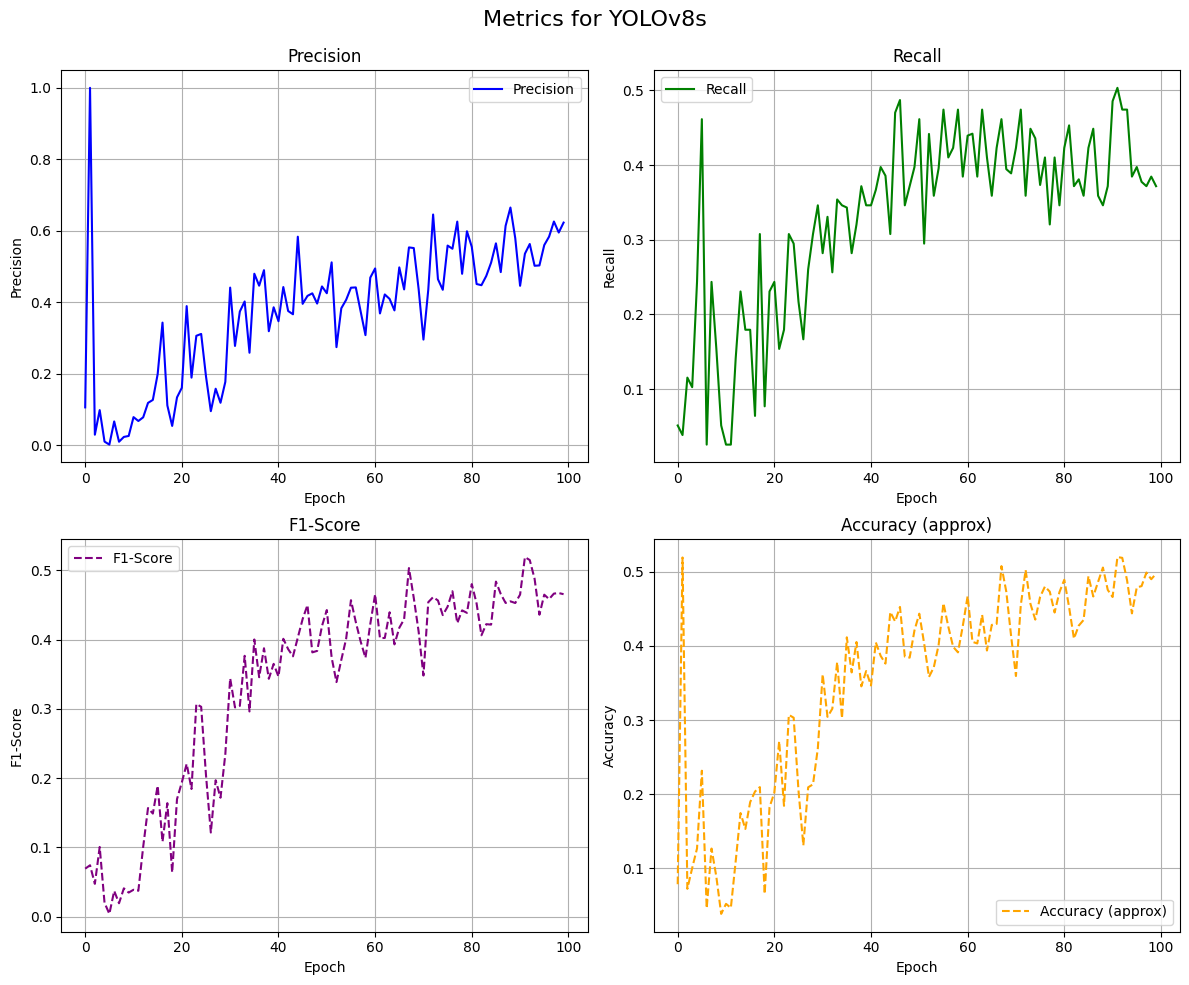

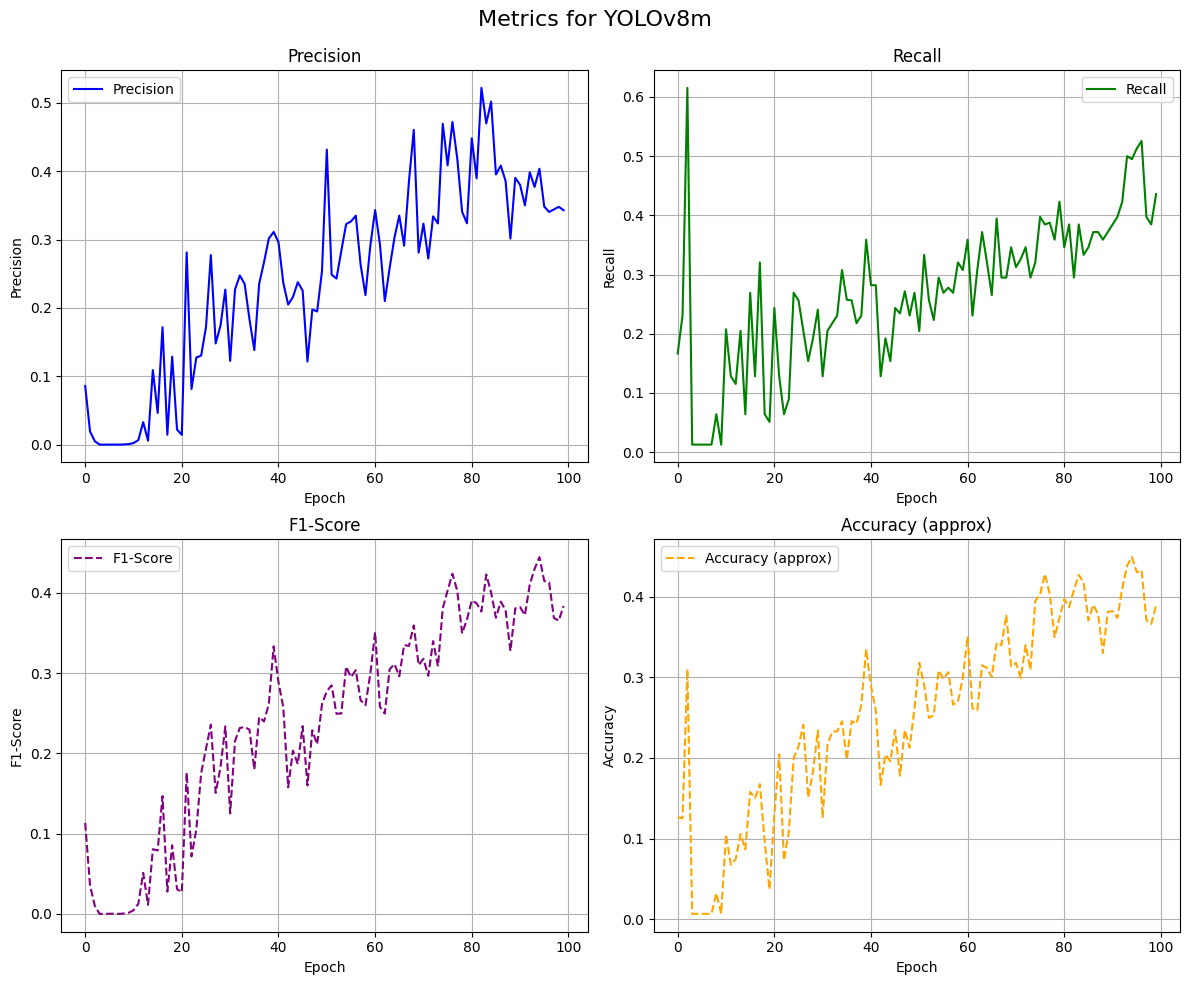

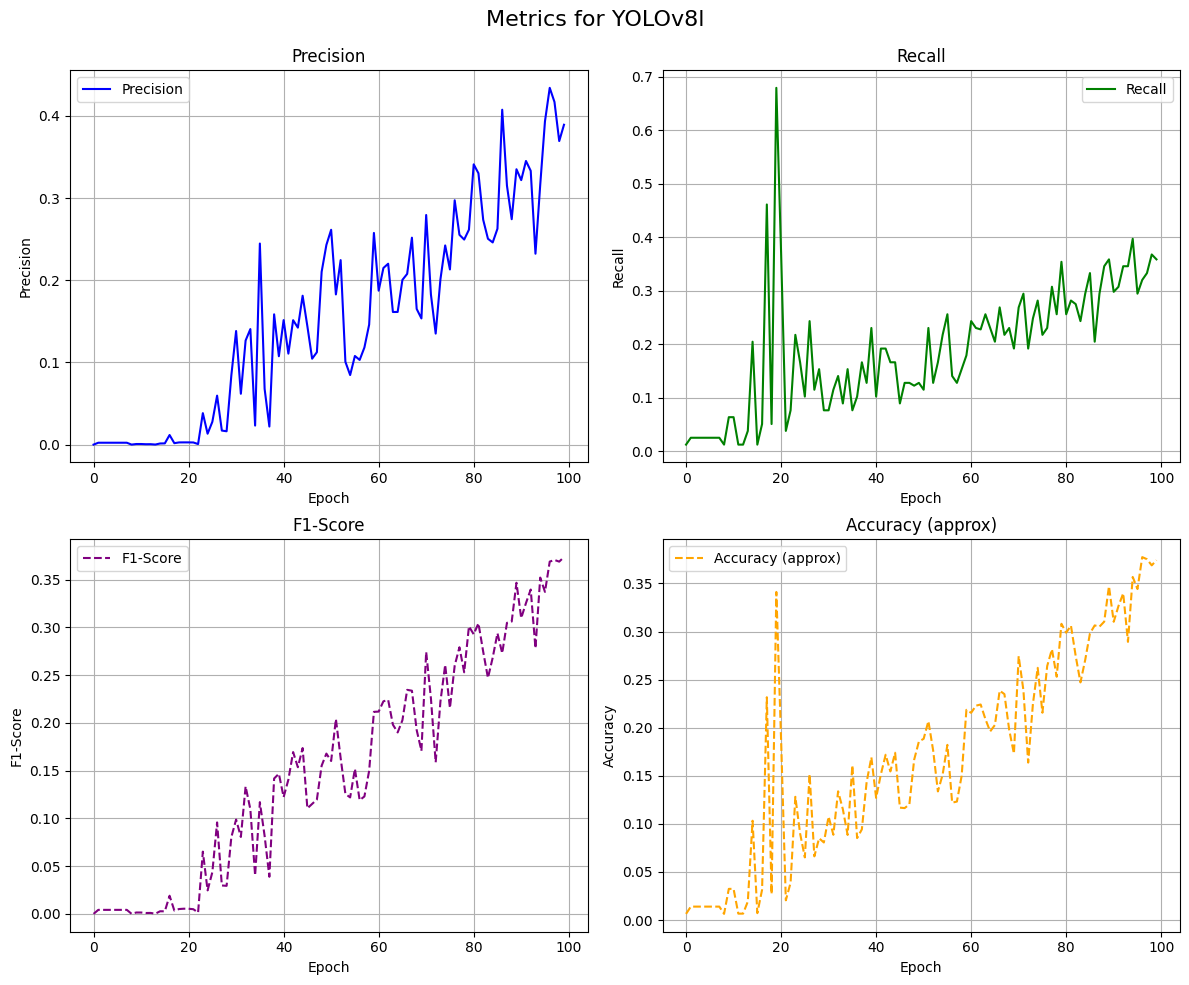

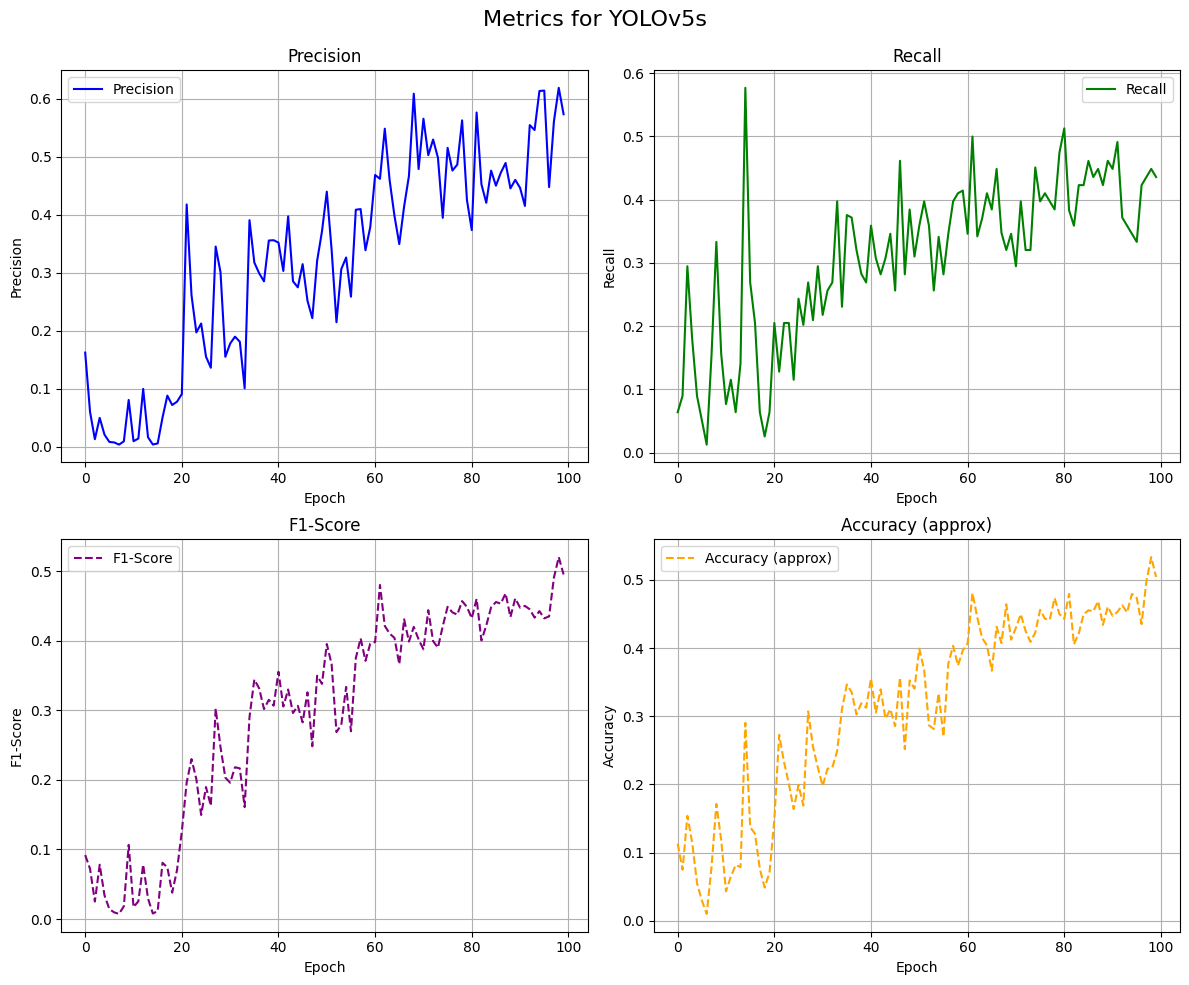

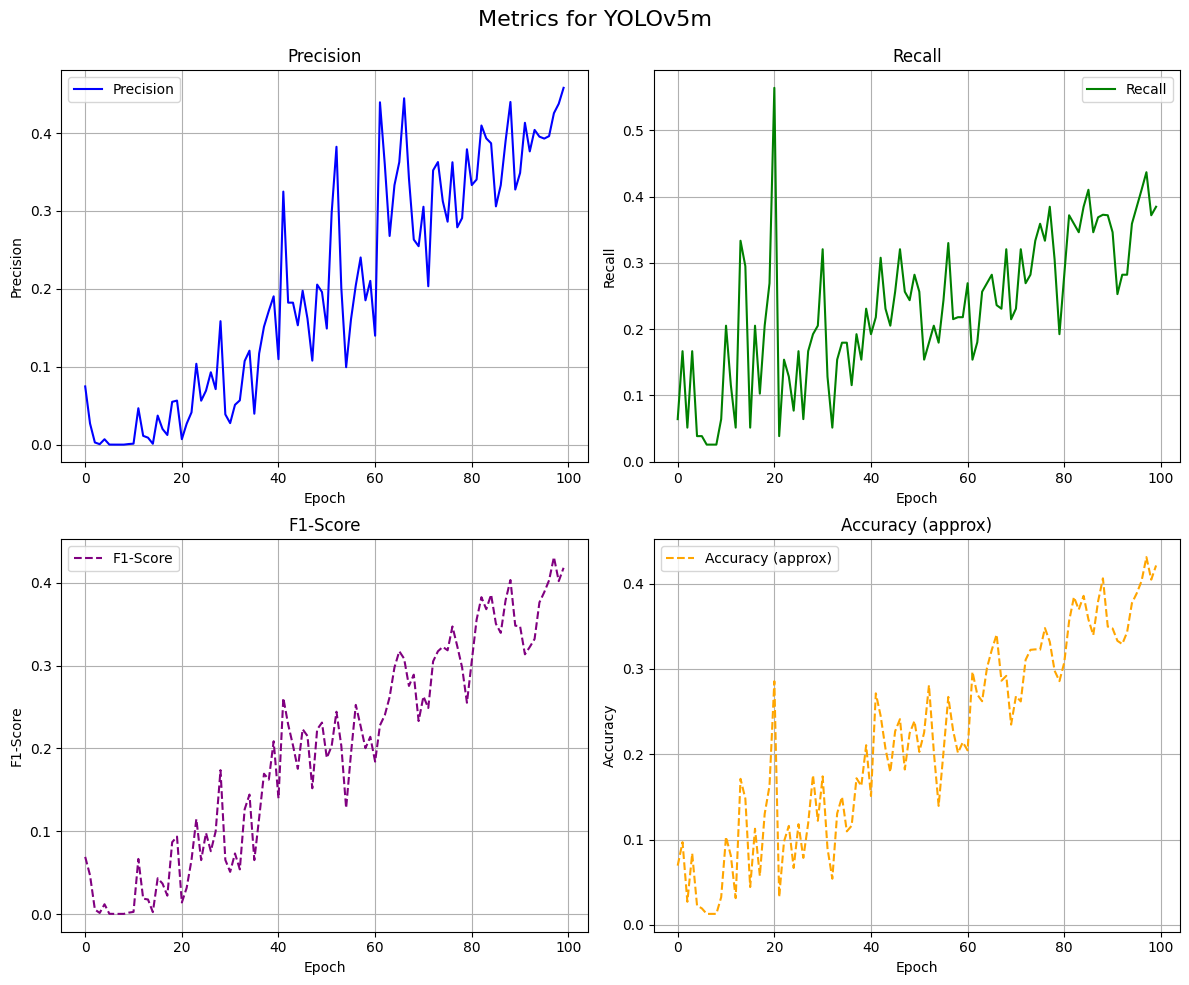

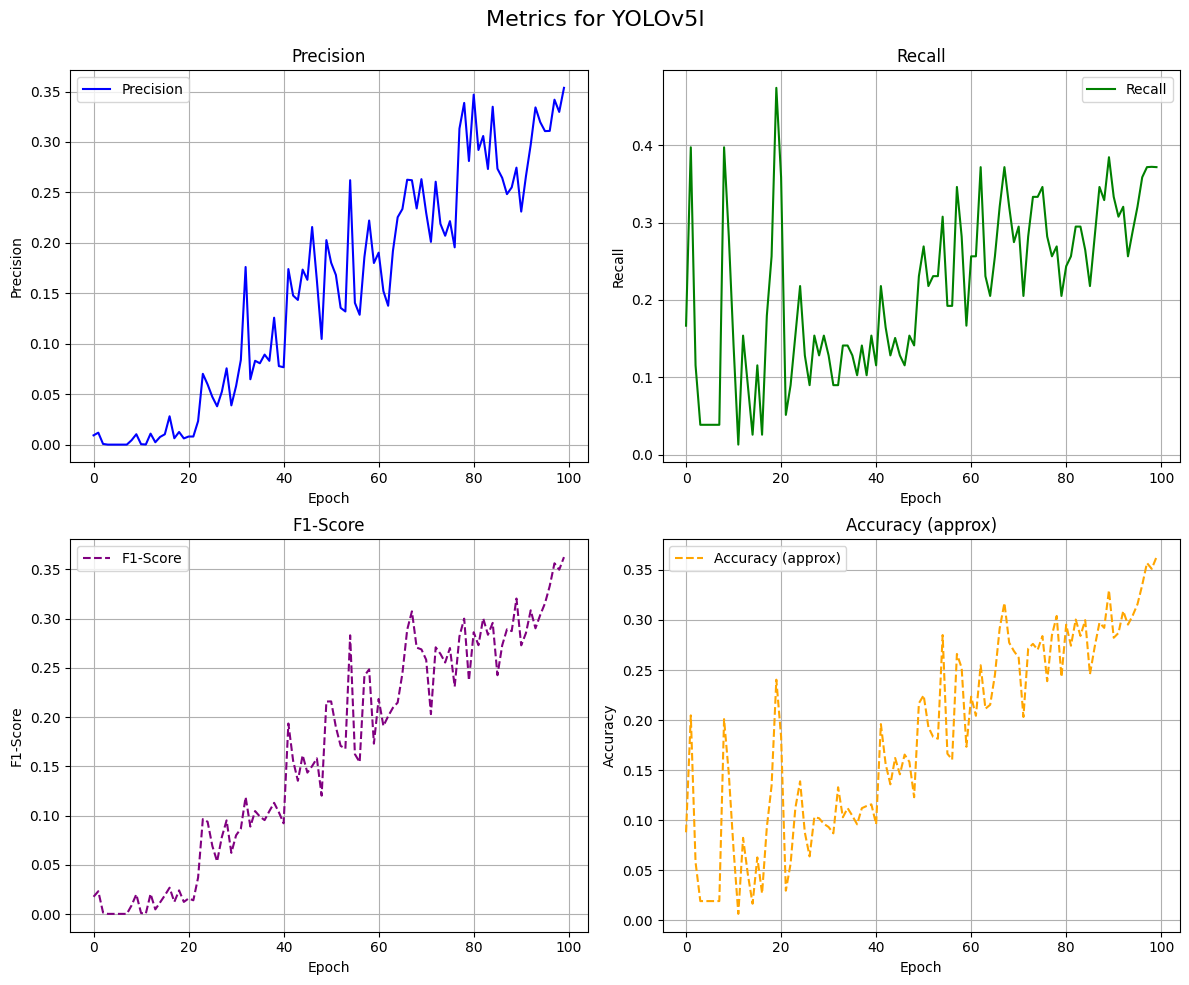

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk menghitung dan memvisualisasikan metrik
def calculate_and_plot_metrics(results_path, model_name):
    # Membaca file hasil pelatihan
    results = pd.read_csv(results_path)

    # Use strip() to remove leading/trailing spaces from column names
    results.columns = results.columns.str.strip()

    # Ambil nilai metrik dari kolom yang benar
    precision = results['metrics/precision(B)']
    recall = results['metrics/recall(B)']
    # F1 Score adalah rata-rata harmonis dari precision dan recall
    f1 = 2 * (precision * recall) / (precision + recall)

    # Accuracy (dalam hal ini, menggunakan precision dan recall)
    accuracy = (precision + recall) / 2  # Sebagai ilustrasi

    # Membuat grafik terpisah untuk setiap metrik
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Membuat 2x2 grid untuk grafik

    # Precision plot
    axs[0, 0].plot(precision, label='Precision', color='blue')
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Precision')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Recall plot
    axs[0, 1].plot(recall, label='Recall', color='green')
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Recall')
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # F1 Score plot
    axs[1, 0].plot(f1, label='F1-Score', color='purple', linestyle='--')
    axs[1, 0].set_title('F1-Score')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('F1-Score')
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Accuracy plot
    axs[1, 1].plot(accuracy, label='Accuracy (approx)', color='orange', linestyle='--')
    axs[1, 1].set_title('Accuracy (approx)')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    # Menyusun tampilan dan menampilkan plot
    plt.tight_layout()
    plt.suptitle(f'Metrics for {model_name}', fontsize=16)
    plt.subplots_adjust(top=0.92)  # Adjust title to fit in the window
    plt.show()

# Path ke hasil pelatihan untuk YOLOv5 dan YOLOv8
yolov8s_results_path = '/content/runs/detect/train/results.csv'
yolov8m_results_path = '/content/runs/detect/train2/results.csv'
yolov8l_results_path = '/content/runs/detect/train3/results.csv'
yolov5s_results_path = '/content/runs/detect/train4/results.csv'
yolov5m_results_path = '/content/runs/detect/train5/results.csv'
yolov5l_results_path = '/content/runs/detect/train6/results.csv'

# Menghitung dan menampilkan metrik untuk setiap model
calculate_and_plot_metrics(yolov8s_results_path, 'YOLOv8s')
calculate_and_plot_metrics(yolov8m_results_path, 'YOLOv8m')
calculate_and_plot_metrics(yolov8l_results_path, 'YOLOv8l')
calculate_and_plot_metrics(yolov5s_results_path, 'YOLOv5s')
calculate_and_plot_metrics(yolov5m_results_path, 'YOLOv5m')
calculate_and_plot_metrics(yolov5l_results_path, 'YOLOv5l')


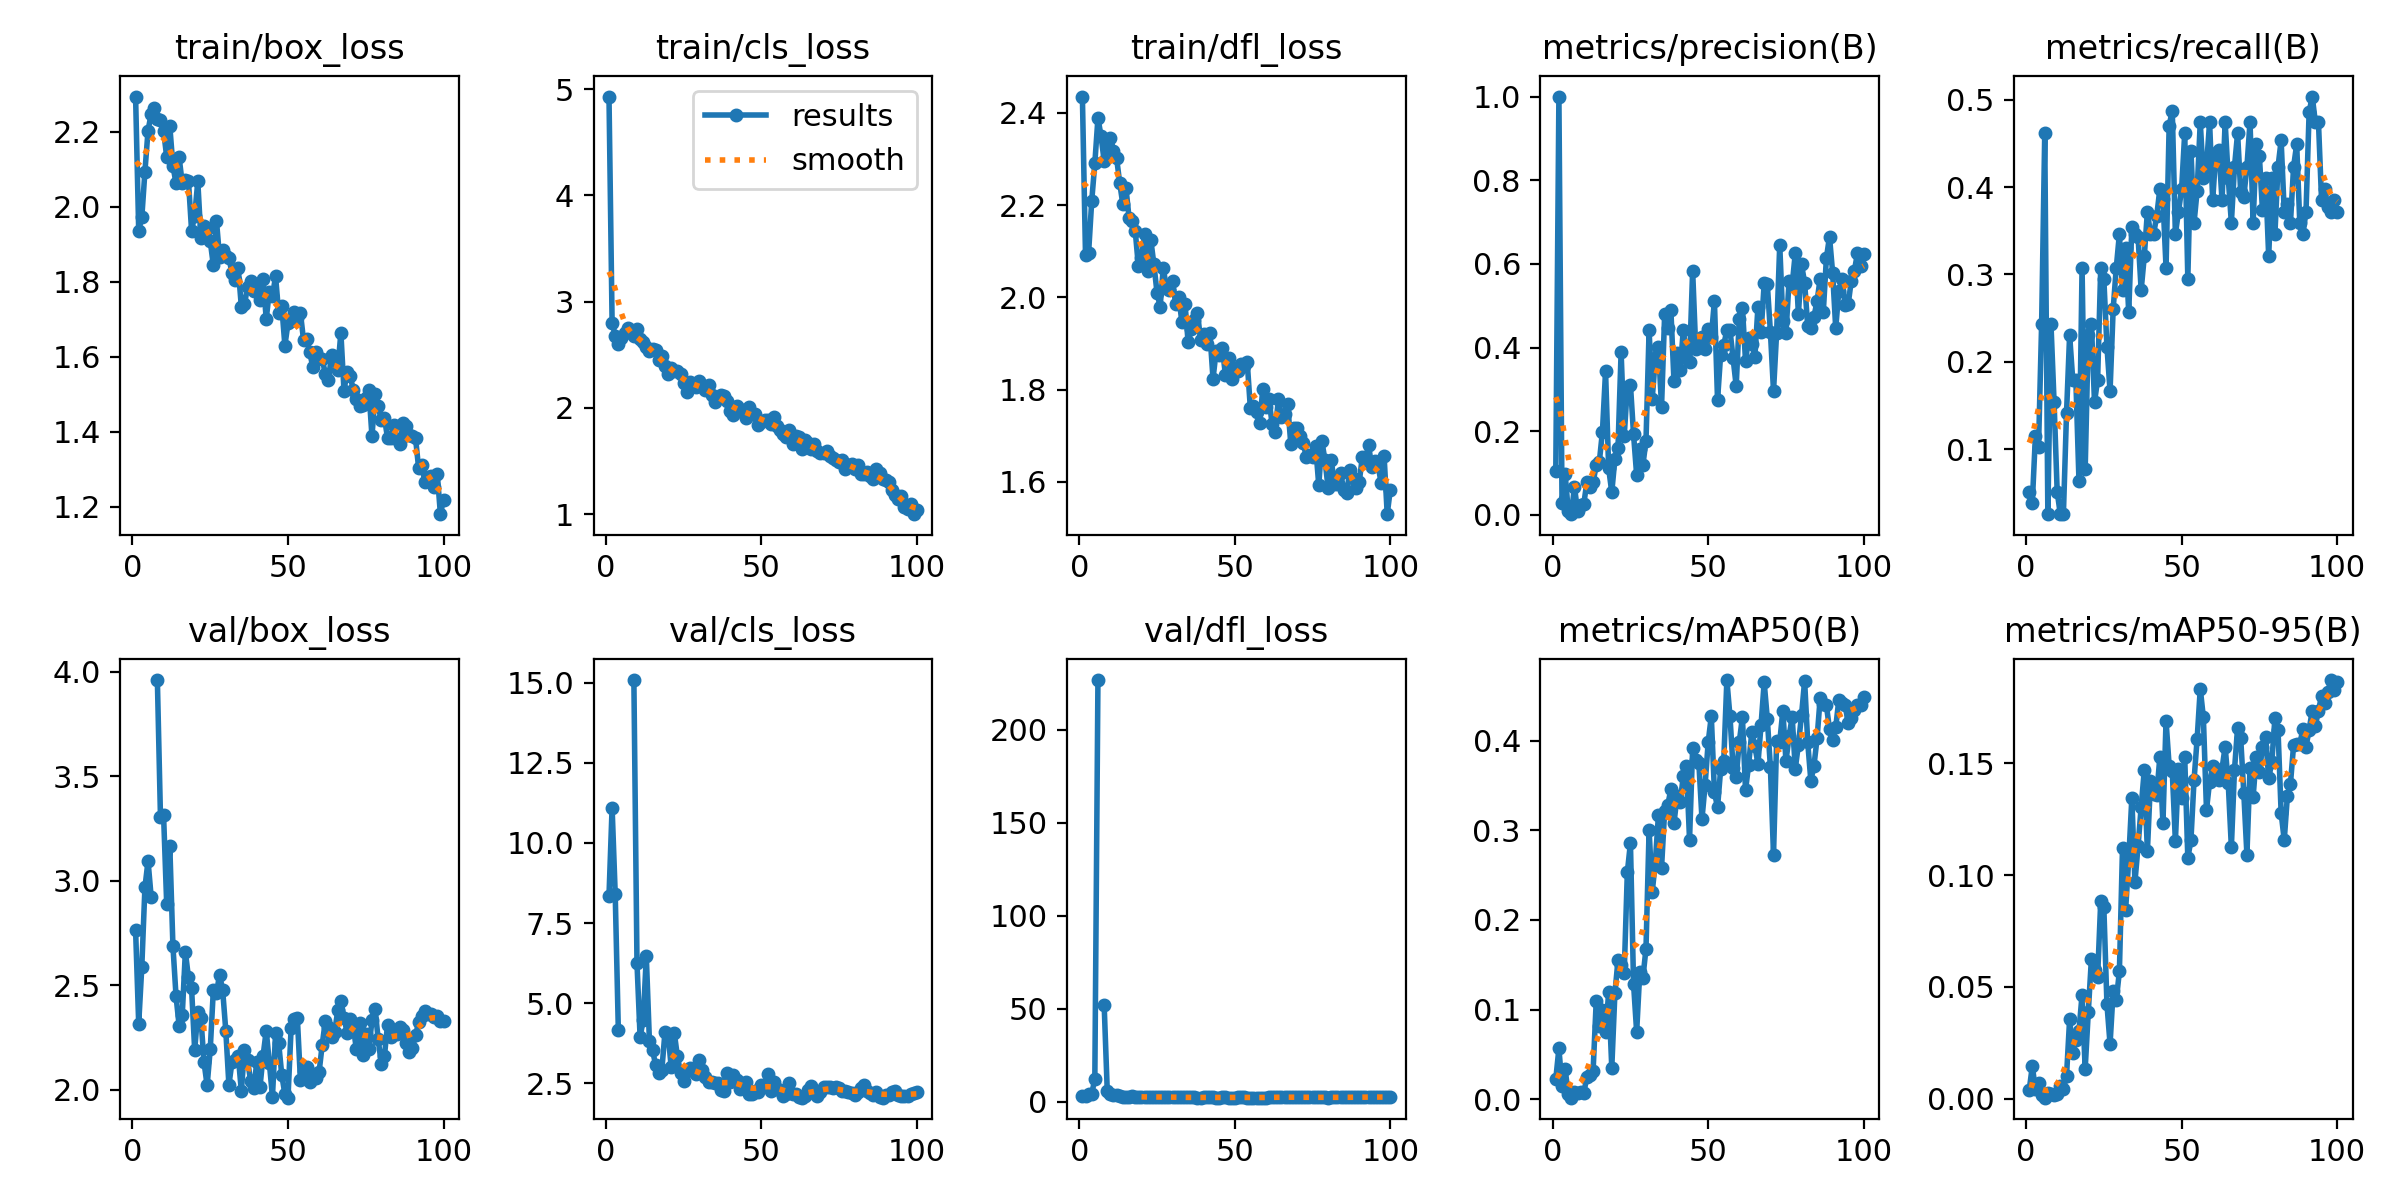

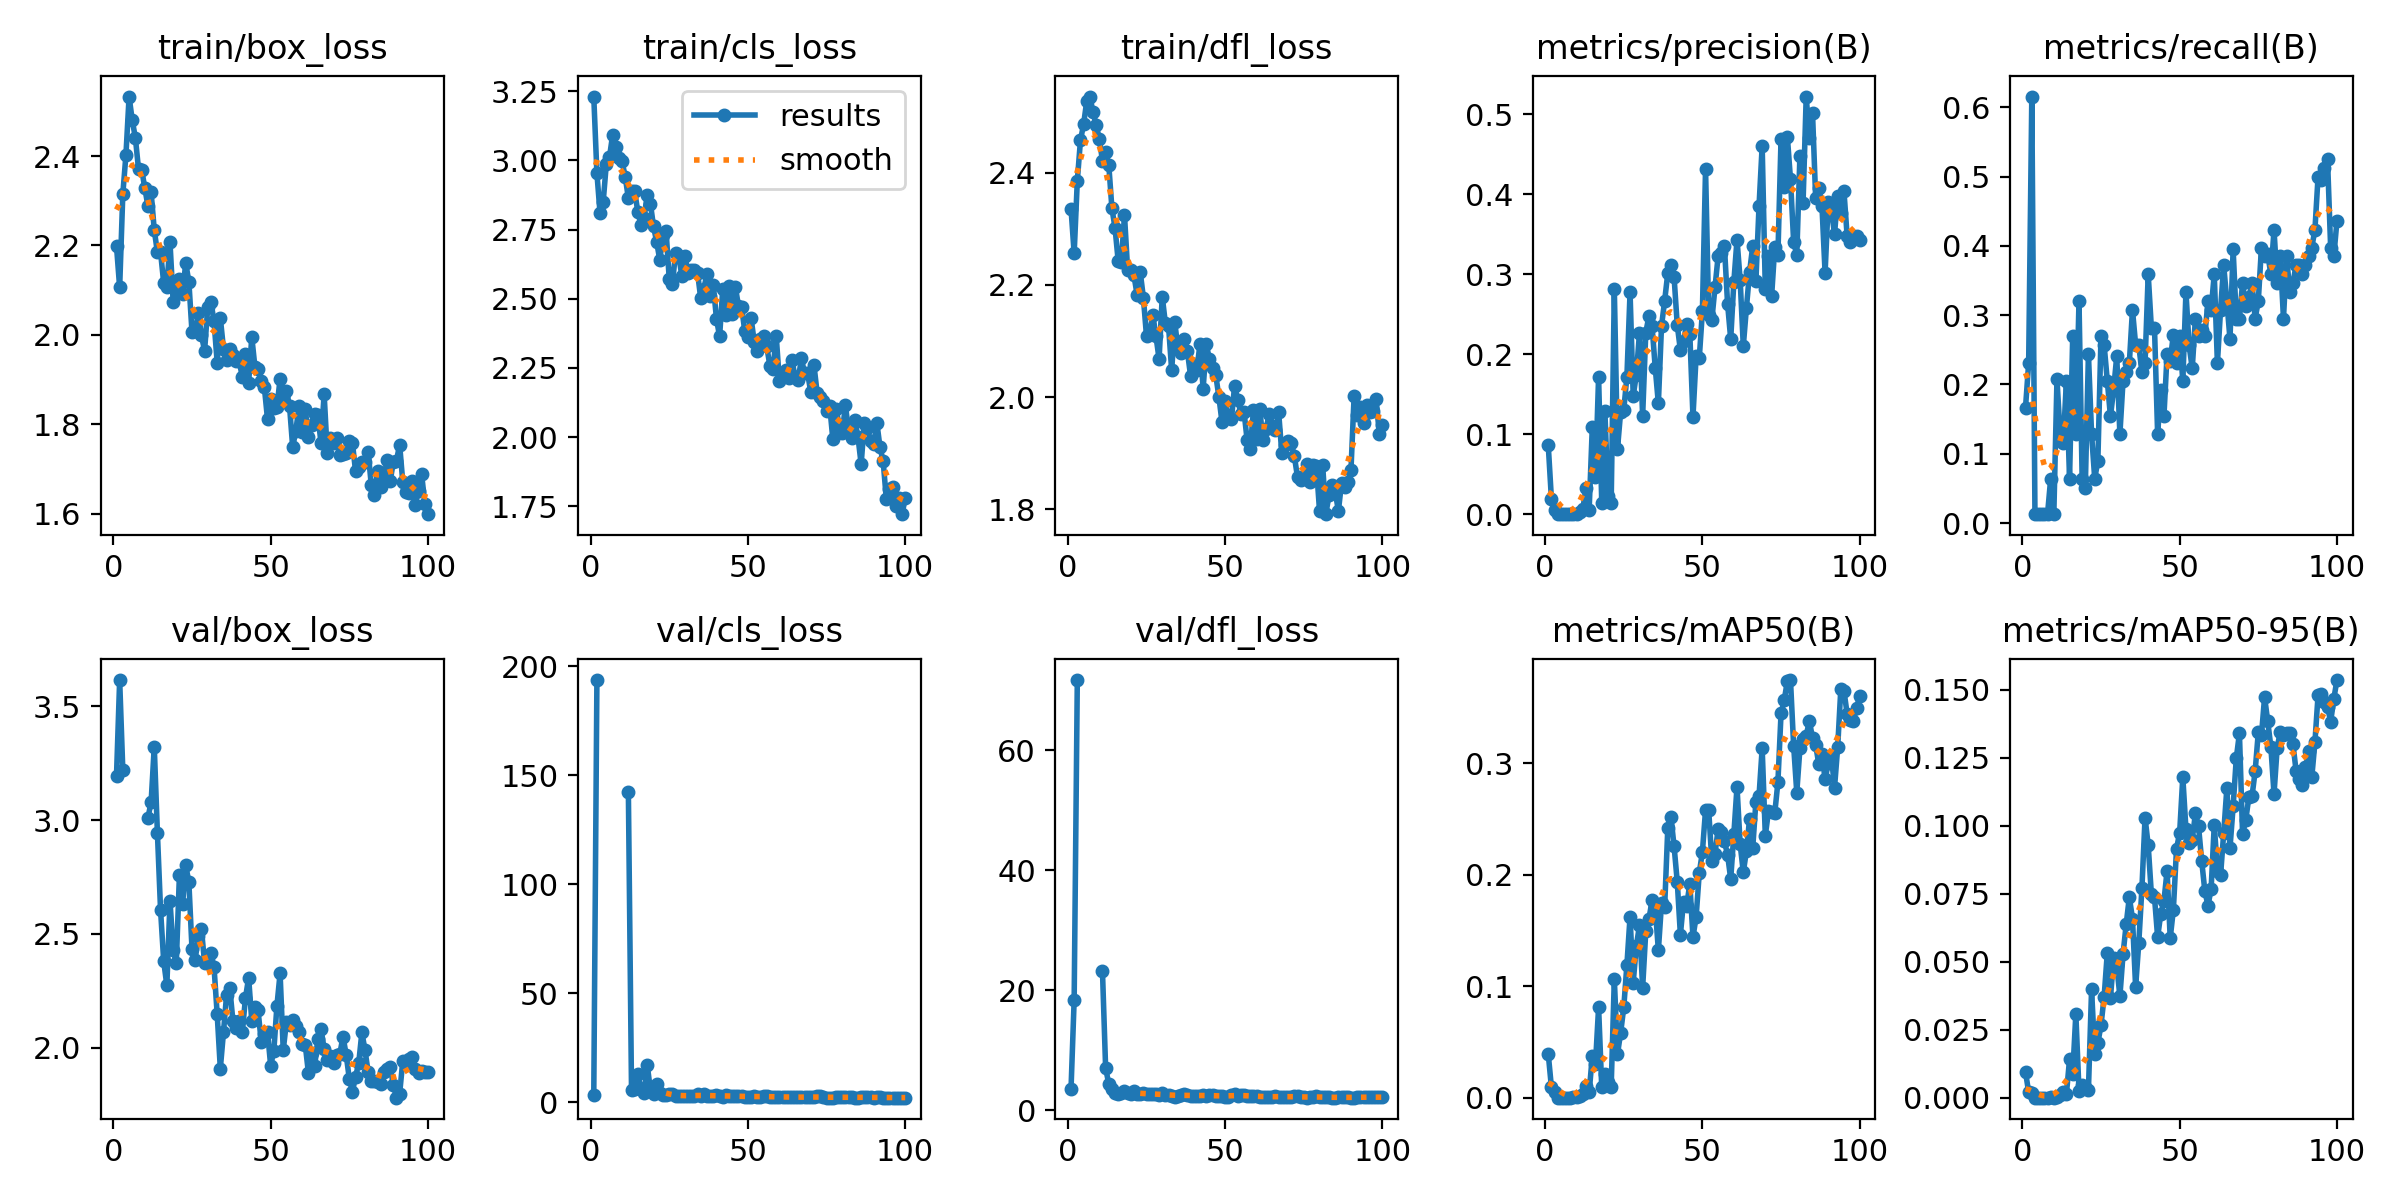

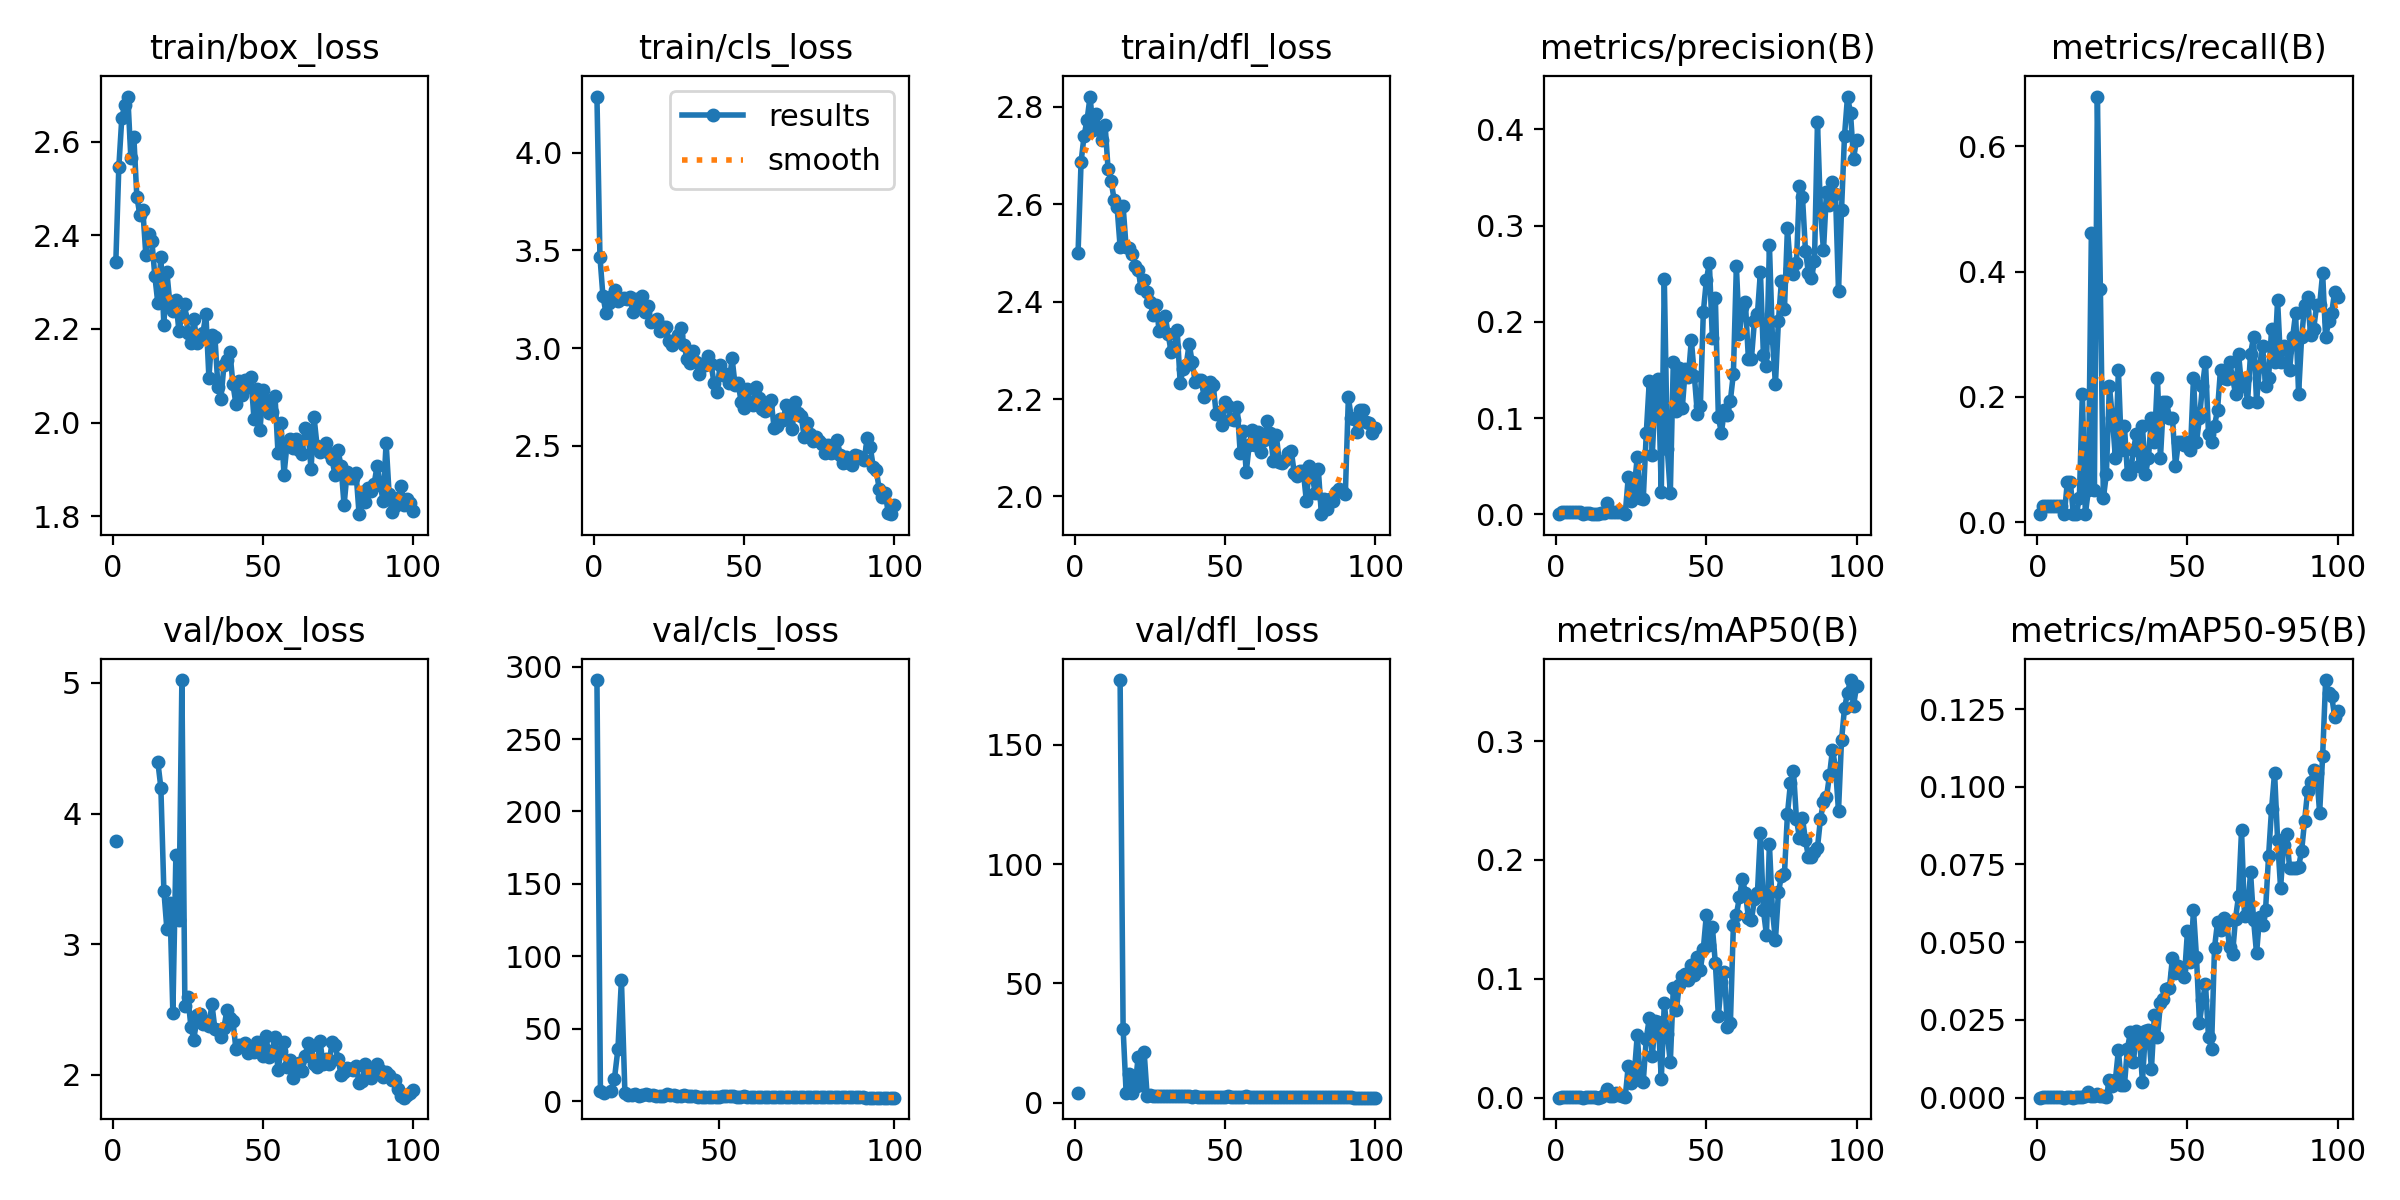

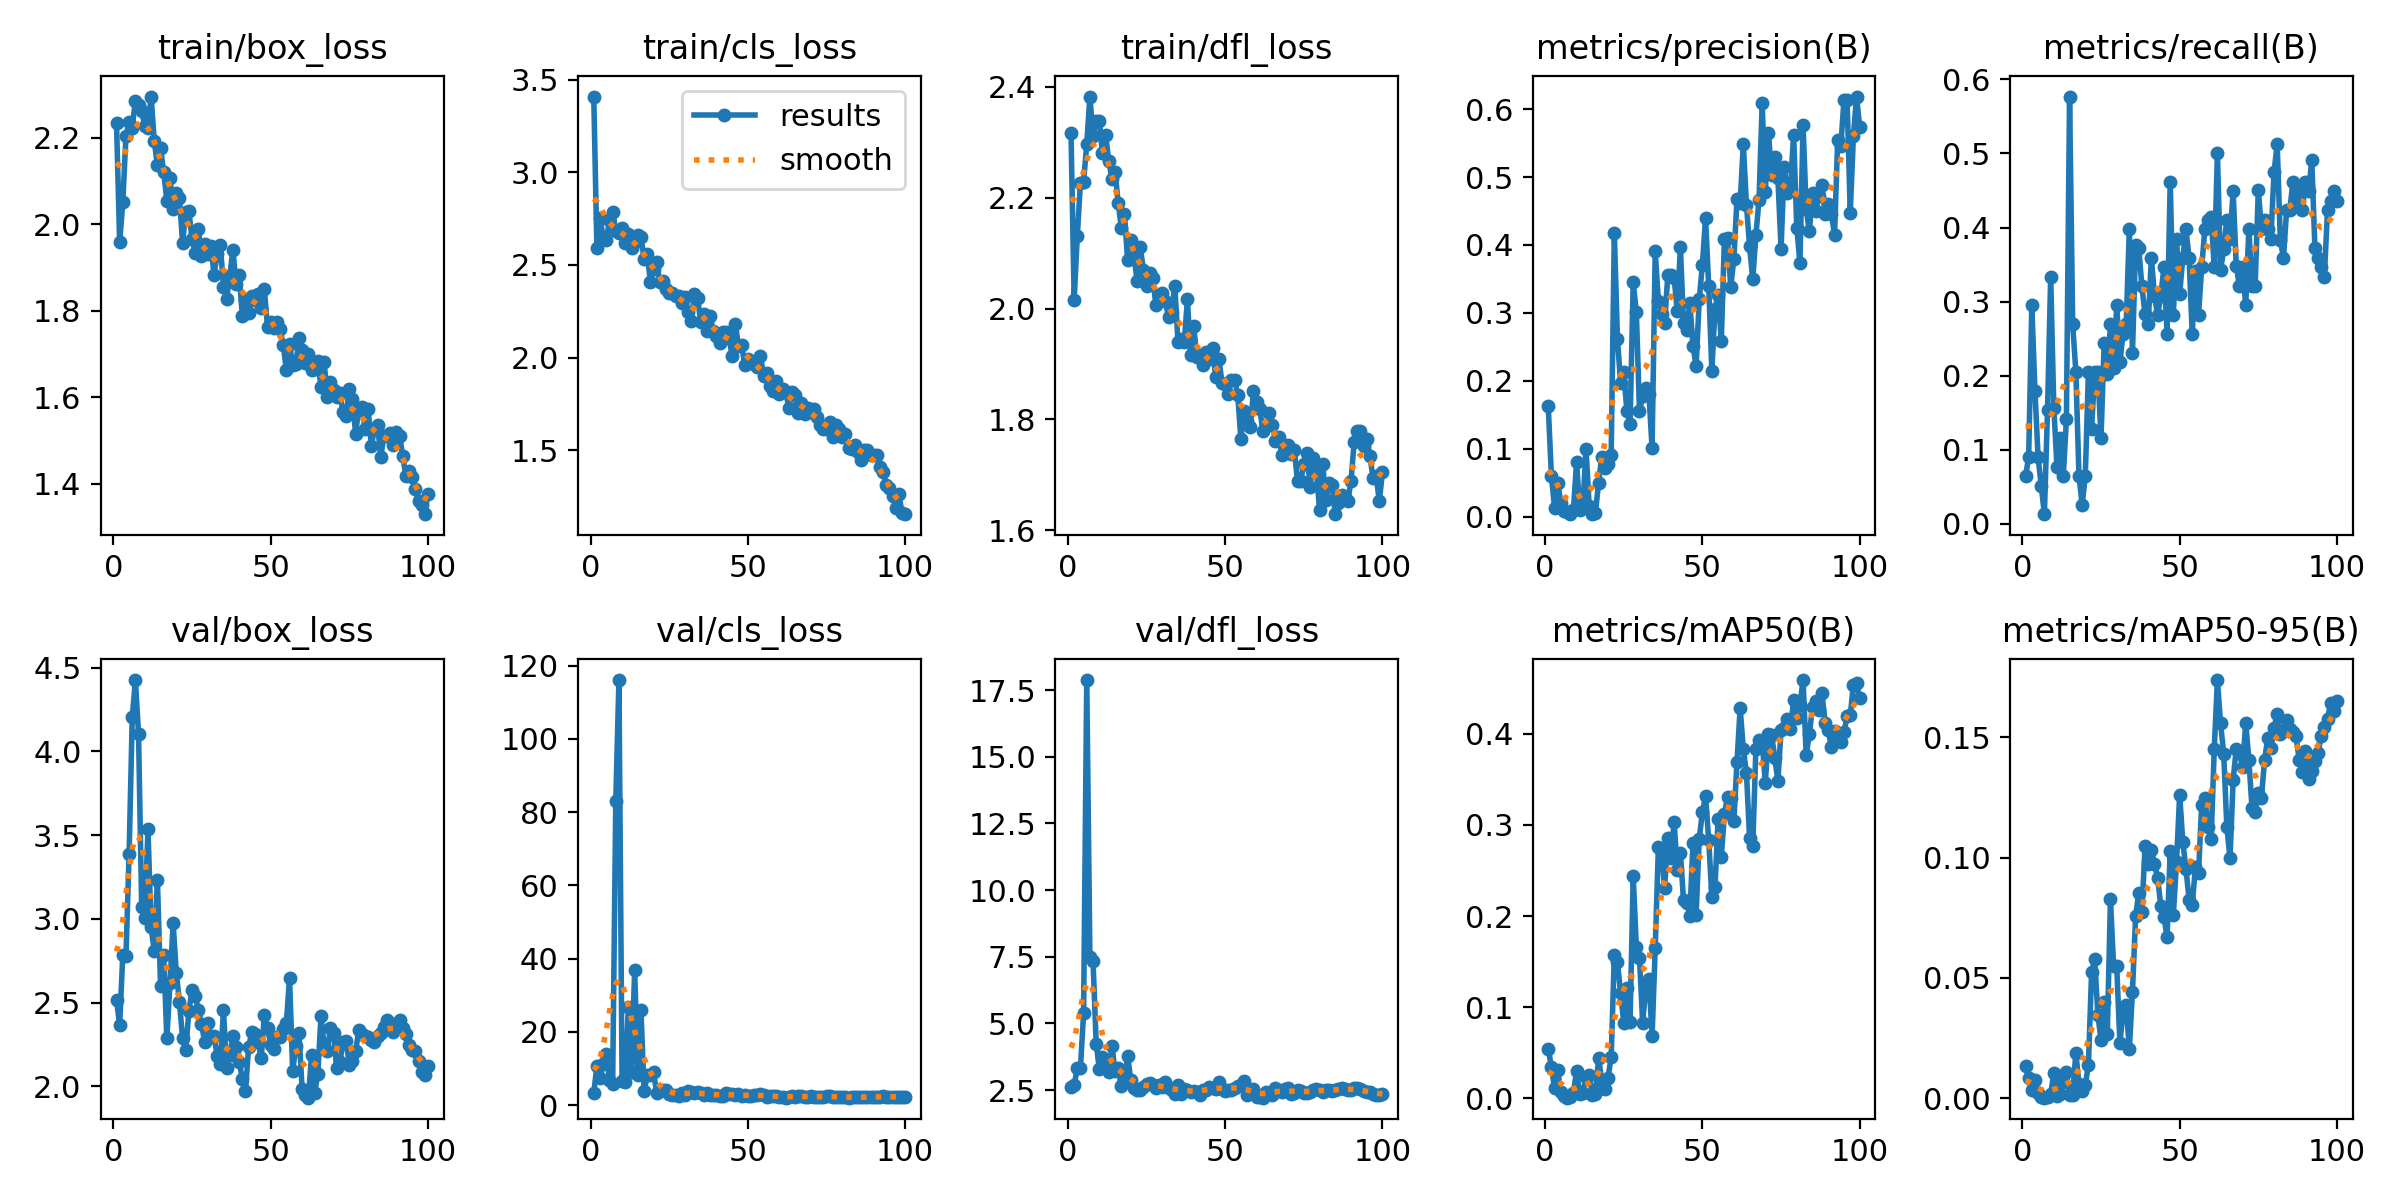

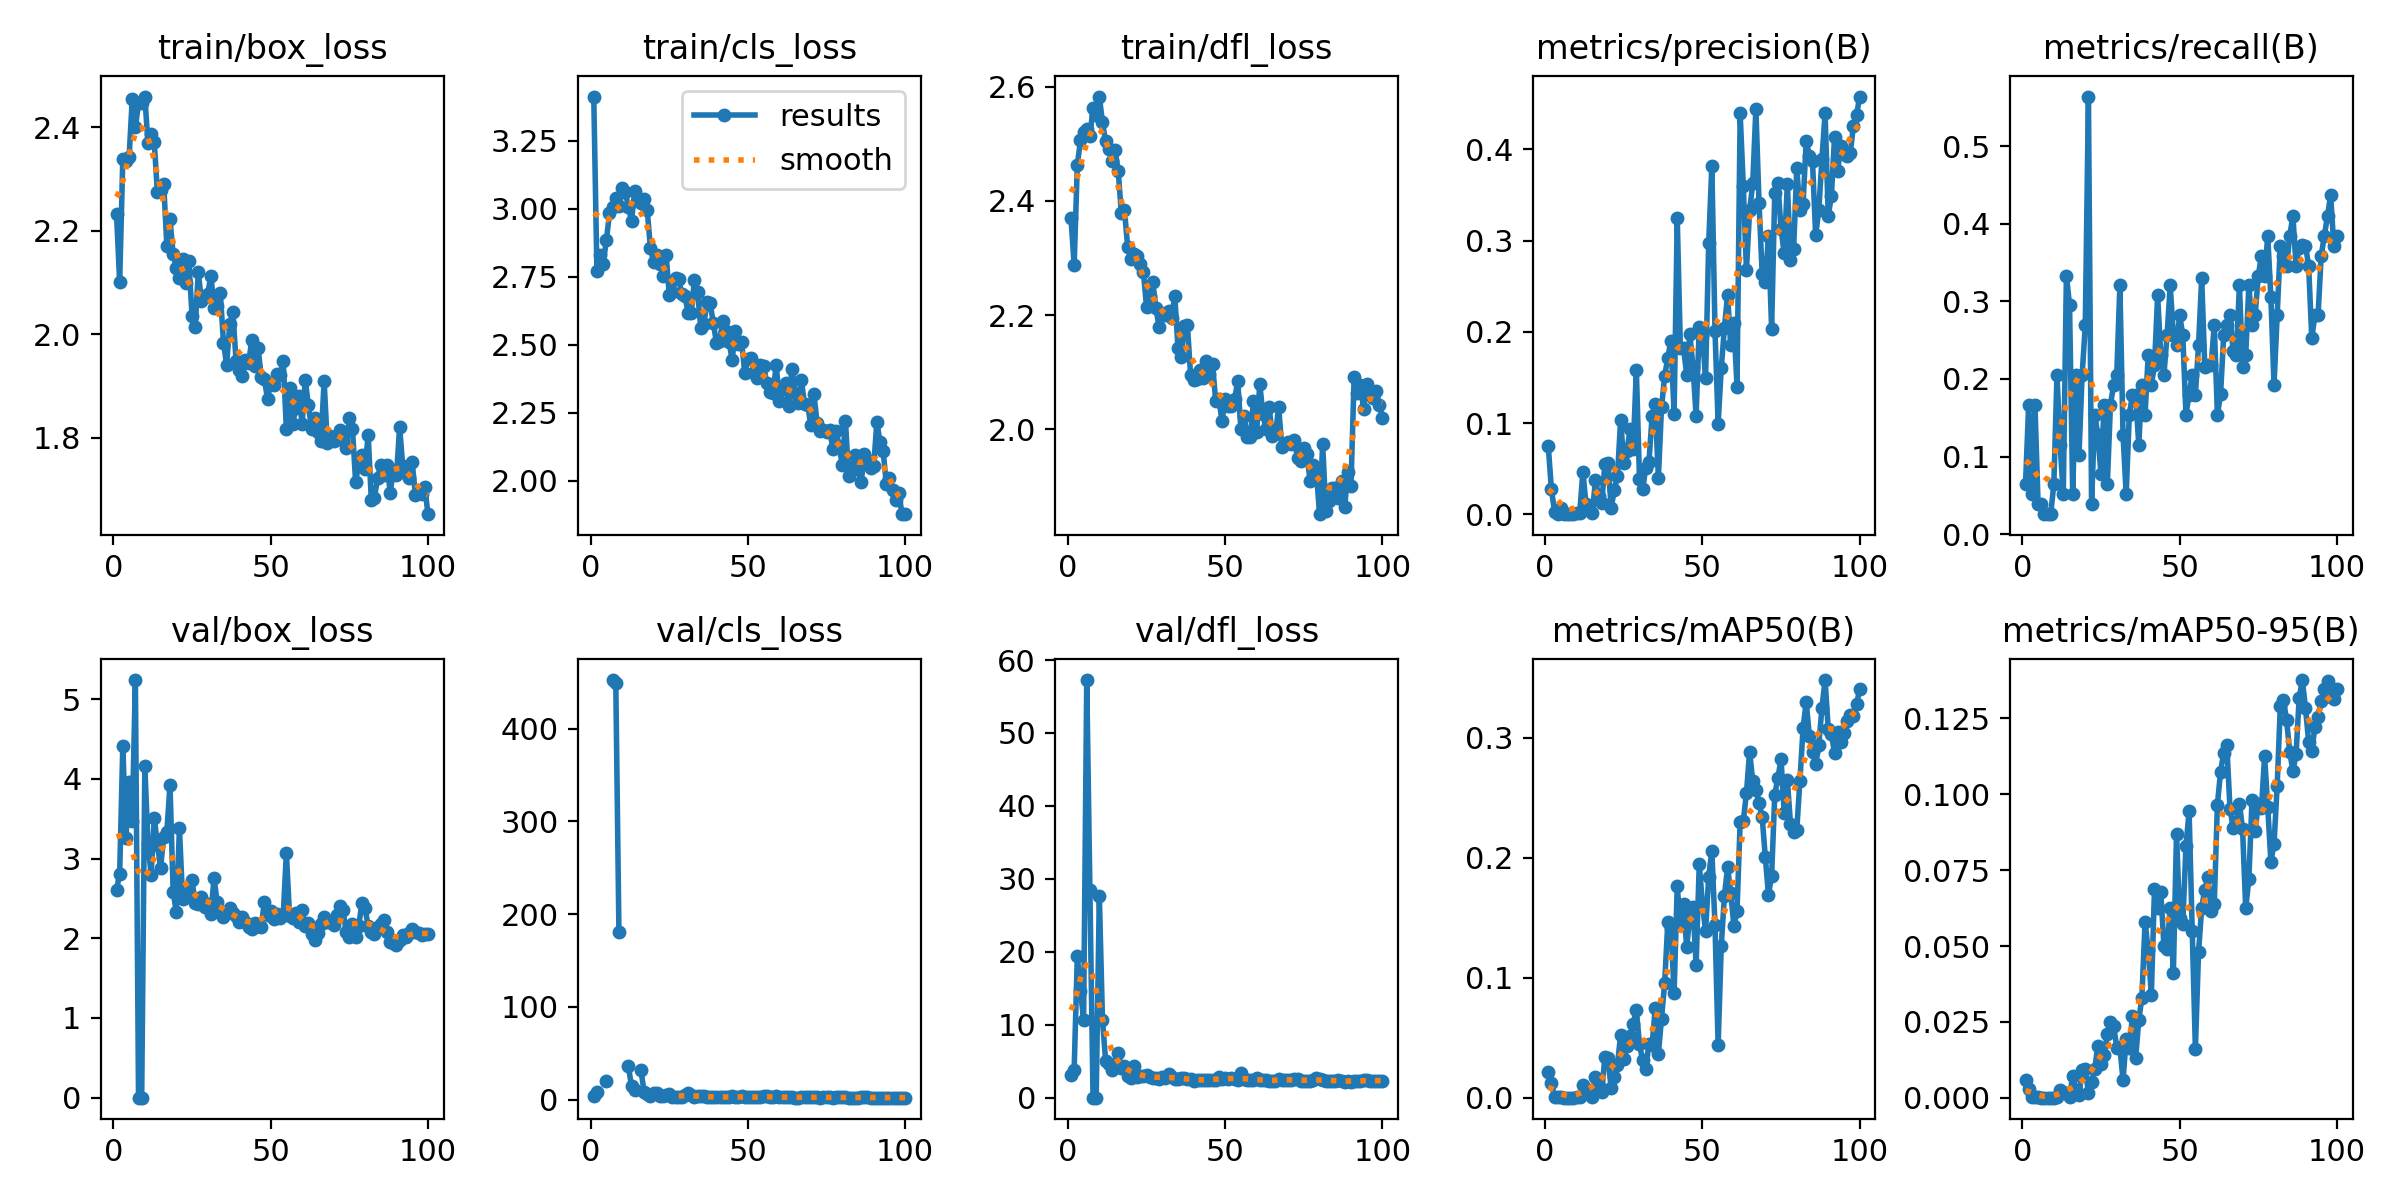

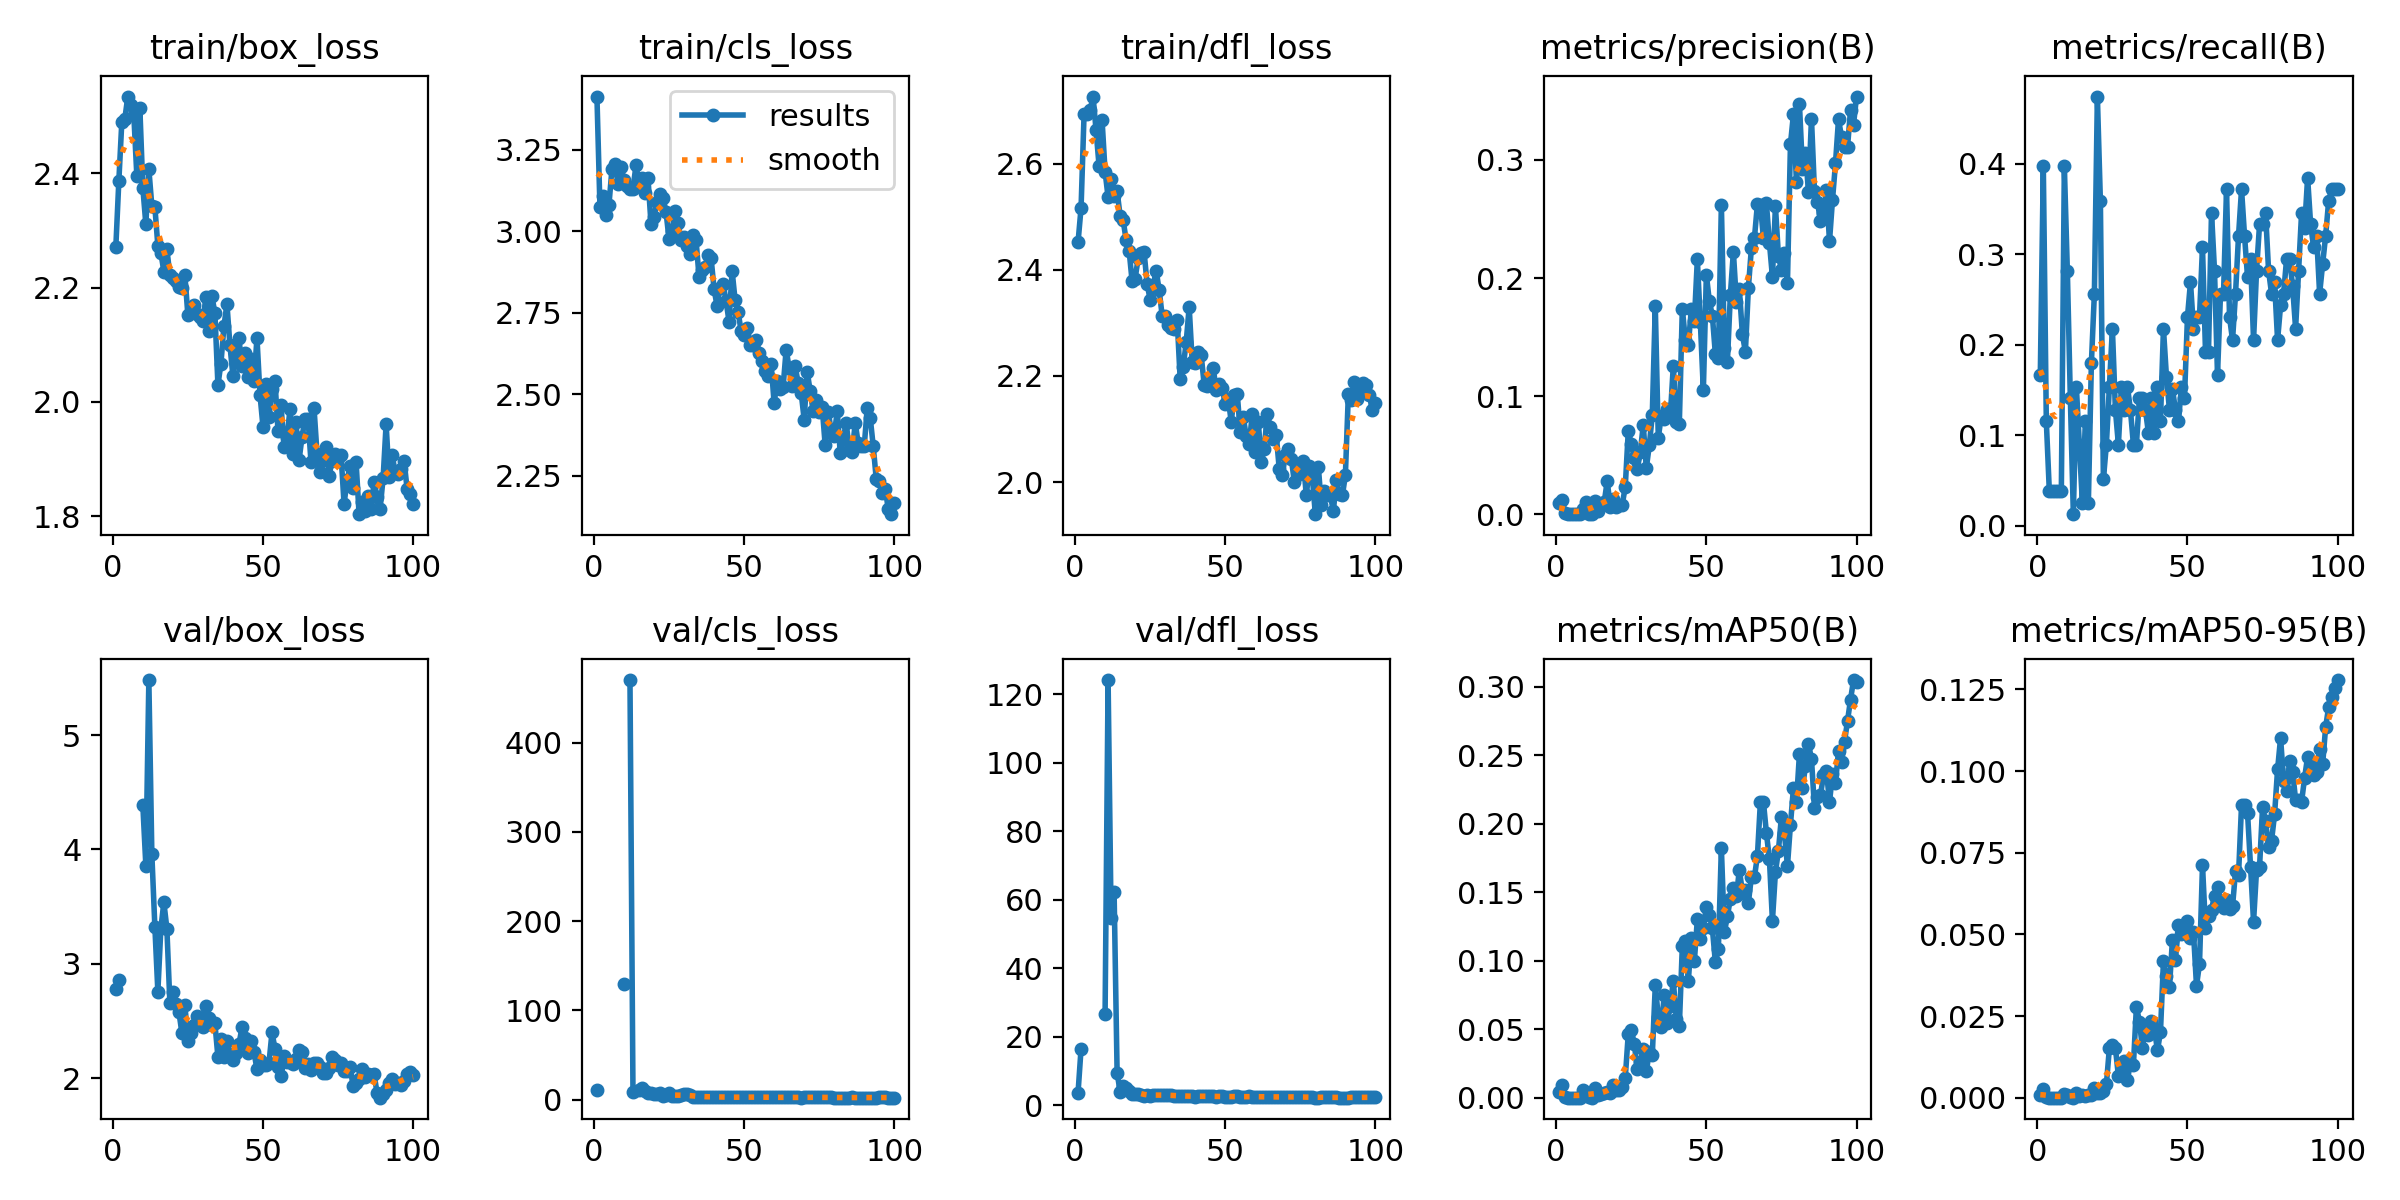

In [ ]:
from IPython.display import Image, display

# Daftar path gambar hasil pelatihan untuk setiap model
image_paths = [
    '/content/runs/detect/train/results.png',  # YOLOv8s
    '/content/runs/detect/train2/results.png',  # YOLOv8m
    '/content/runs/detect/train3/results.png',  # YOLOv8l
    '/content/runs/detect/train4/results.png',  # YOLOv5s
    '/content/runs/detect/train5/results.png',  # YOLOv5m
    '/content/runs/detect/train6/results.png'   # YOLOv5l
]

# Menampilkan setiap gambar
for image_path in image_paths:
    display(Image(filename=image_path))
